<a href="https://colab.research.google.com/github/descartesmbogning/patent-analysis/blob/main/1_patent_analysis_trend_new_data_23102023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
from functools import reduce
import seaborn as sns
import missingno as msno
%matplotlib inline

import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

In [ ]:
# Set the figure size - handy for larger output
plt.rcParams["figure.figsize"] = [10, 6]
# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

In [ ]:
from scipy import stats #the only import you actually need for this
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

In [ ]:
# function that tests distribution then picks test accordingly
def test_sig(x, y):
    if stats.shapiro(x).pvalue >= 0.05 and stats.shapiro(y).pvalue >= 0.05: #if they are normally distriuted
        print("t-test")
        return stats.ttest_ind(x,y)
    else:
        print("mann-whitney")
        return stats.mannwhitneyu(x, y)

In [ ]:
pd.set_option('display.max_columns', None)

## import data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import data
data = pd.read_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/patent-phage-therapy-lens-23102023-tiab.csv').reset_index()


data.head()

,index,#,Jurisdiction,Kind,Display Key,Lens ID,Publication Date,Publication Year,Application Number,Application Date,Priority Numbers,Earliest Priority Date,Title,Abstract,Applicants,Inventors,Owners,URL,Document Type,Has Full Text,Cites Patent Count,Cited by Patent Count,Simple Family Size,Extended Family Size,Sequence Count,CPC Classifications,IPCR Classifications,US Classifications,NPL Citation Count,NPL Resolved Citation Count,NPL Resolved Lens ID(s),NPL Resolved External ID(s),NPL Citations,Legal Status
0,0,1,RU,C2,RU 2214829 C2,069-390-611-717-343,2003-10-27,2003,RU 2001129920 A,2001-11-05,RU 2001129920 A,2001-11-05,METHOD FOR TUBERCULOSIS PHAGOTHERAPY,"FIELD: medicine, phthisiology. SUBSTANCE: meth...",NOVOSIB NII T;;UBERKULEZA,KURUNOV JU N;;KURUNOVA N N;;SHATALOVA N D,NaN,https://lens.org/069-390-611-717-343,Granted Patent,no,0,4,1,1,0,NaN,A61K35/76;;A61P31/06,NaN,0,0,NaN,NaN,NaN,EXPIRED
1,1,2,JP,A,JP 2016104011 A,114-759-028-882-736,2016-06-09,2016,JP 2015243657 A,2015-12-14,US 38401510 P,2010-09-17,"ANTIBACTERIAL PHAGES, PHAGE PEPTIDES AND USE M...",PROBLEM TO BE SOLVED: To provide novel bacteri...,TECNIFAR-INDUSTRIA TECNICA FARM S A;;TECHNOPHA...,MIGUEL ANGELO DA COSTA GARCIA;;CARLOS JORGE SO...,NaN,https://lens.org/114-759-028-882-736,Patent Application,no,1,1,48,48,1300,C12N2795/00032;;A61K31/505;;A61K31/7056;;A61K3...,C12N7/00;;A61K35/76;;A61P31/04;;C12N15/09,NaN,0,0,NaN,NaN,NaN,ACTIVE
2,2,3,AU,A1,AU 2015/255318 A1,094-982-928-461-863,2015-12-03,2015,AU 2015/255318 A,2015-11-13,AU 2015/255318 A;;AU 2010/211456 A;;US 2183450...,2009-02-06,"Antibacterial phage, phage peptides and method...",The present invention is directed to the field...,TECNIFAR INDÚSTRIA TÉCNICA FARMACÉUTICA S A;;T...,DA COSTA GARCIA MIGUEL ÂNGELO;;SOUSA DE SÃO JO...,"TECHNOPHAGE, INVESTIGACAO E DESENVOLVIMENTO EM...",https://lens.org/094-982-928-461-863,Patent Application,no,0,0,3,45,0,NaN,A61K35/76;;C12N9/14;;G01N33/569,NaN,0,0,NaN,NaN,NaN,ACTIVE
3,3,4,US,A1,US 2016/0022747 A1,167-908-891-122-112,2016-01-28,2016,US 201514852112 A,2015-09-11,US 201514852112 A;;US 201113148009 A;;PT 20100...,2009-02-06,"Antibacterial Phage, Phage Peptides and Method...",The present invention is directed to the field...,TECHNOPHAGE INVESTIGACAO E DESENVOLVIMENTO EM ...,DA COSTA GARCIA MIGUEL ANGELO;;SOUSA DE SAO JO...,TECHNOPHAGE INVESTIGACAO E DESENVOLVIMENTO EM ...,https://lens.org/167-908-891-122-112,Patent Application,yes,0,1,42,45,816,A61K38/00;;A61K45/06;;C07K14/005;;C12N7/00;;C1...,A61K35/76;;A61K9/00;;C12N7/00,NaN,0,0,NaN,NaN,NaN,ACTIVE
4,4,5,AU,A1,AU 2017/204331 A1,112-018-476-081-94X,2017-07-13,2017,AU 2017/204331 A,2017-06-26,AU 2017/204331 A;;AU 2015/255313 A;;AU 2011/30...,2011-09-19,"Antibacterial phage, phage peptides and method...",The present invention is directed to the field...,TECHNOPHAGE INVESTIGACAO E DESENVOLVIMENTO EM ...,DA COSTA GARCIA MIGUEL ANGELO;;SOUSA DE SAO JO...,NaN,https://lens.org/112-018-476-081-94X,Patent Application,no,0,3,1,1,0,Y02A50/30,A61K35/76;;C12N7/00,NaN,0,0,NaN,NaN,NaN,DISCONTINUED


In [ ]:
# Check the number of patents
num_patents = data.shape[0]
print(f"Number of Patents: {num_patents}")


Number of Patents: 2365


In [ ]:
#data.drop_duplicates()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2365 entries, 0 to 2364
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   index                        2365 non-null   int64 
 1   #                            2365 non-null   int64 
 2   Jurisdiction                 2365 non-null   object
 3   Kind                         2365 non-null   object
 4   Display Key                  2365 non-null   object
 5   Lens ID                      2365 non-null   object
 6   Publication Date             2365 non-null   object
 7   Publication Year             2365 non-null   int64 
 8   Application Number           2365 non-null   object
 9   Application Date             2365 non-null   object
 10  Priority Numbers             2363 non-null   object
 11  Earliest Priority Date       2363 non-null   object
 12  Title                        2365 non-null   object
 13  Abstract                     2348

In [ ]:
data['Application Date'] = pd.to_datetime(data['Application Date'])
data['Earliest Priority Date'] = pd.to_datetime(data['Earliest Priority Date'])

In [ ]:
data['Application Year'] = data['Application Date'].dt.year
data['Earliest Priority Year'] = data['Earliest Priority Date'].dt.year

In [ ]:
# Convert 'Application Year' to integers
data['Publication Year'] = data['Publication Year'].astype('Int64')
data['Application Year'] = data['Application Year'].astype('Int64')
data['Earliest Priority Year'] = data['Earliest Priority Year'].astype('Int64')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2365 entries, 0 to 2364
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   index                        2365 non-null   int64         
 1   #                            2365 non-null   int64         
 2   Jurisdiction                 2365 non-null   object        
 3   Kind                         2365 non-null   object        
 4   Display Key                  2365 non-null   object        
 5   Lens ID                      2365 non-null   object        
 6   Publication Date             2365 non-null   object        
 7   Publication Year             2365 non-null   Int64         
 8   Application Number           2365 non-null   object        
 9   Application Date             2365 non-null   datetime64[ns]
 10  Priority Numbers             2363 non-null   object        
 11  Earliest Priority Date       2363 non-null 

# Patent trends

In [ ]:
data['Publication Year'].count()

2365

In [ ]:
data['Application Year'].count()

2365

In [ ]:
data['Earliest Priority Year'].count()

2363

In [ ]:
count_year_1 = data['Application Year'].value_counts().rename('Application')
count_year_2 = data['Earliest Priority Year'].value_counts().rename('Earliest Priority')
count_year_3 = data['Publication Year'].value_counts().rename('Publication')

data_trend = pd.concat([count_year_1, count_year_2, count_year_3], axis=1).fillna(0).astype(int).reset_index().rename(columns={'index': 'Year'})
data_trend

,Year,Application,Earliest Priority,Publication
0,2021,206,193,228
1,2020,180,187,177
2,2022,175,129,195
3,2019,165,155,166
4,2017,164,159,105
...,...,...,...,...
60,1974,0,0,3
61,1960,0,0,1
62,1975,0,0,1
63,1970,0,0,1


In [ ]:
data_trend.head(60)

,Year,Application,Earliest Priority,Publication
0,2021,206,193,228
1,2020,180,187,177
2,2022,175,129,195
3,2019,165,155,166
4,2017,164,159,105
5,2018,124,120,164
6,2016,114,131,92
7,2015,106,100,87
8,2012,74,75,70
9,2014,74,77,72


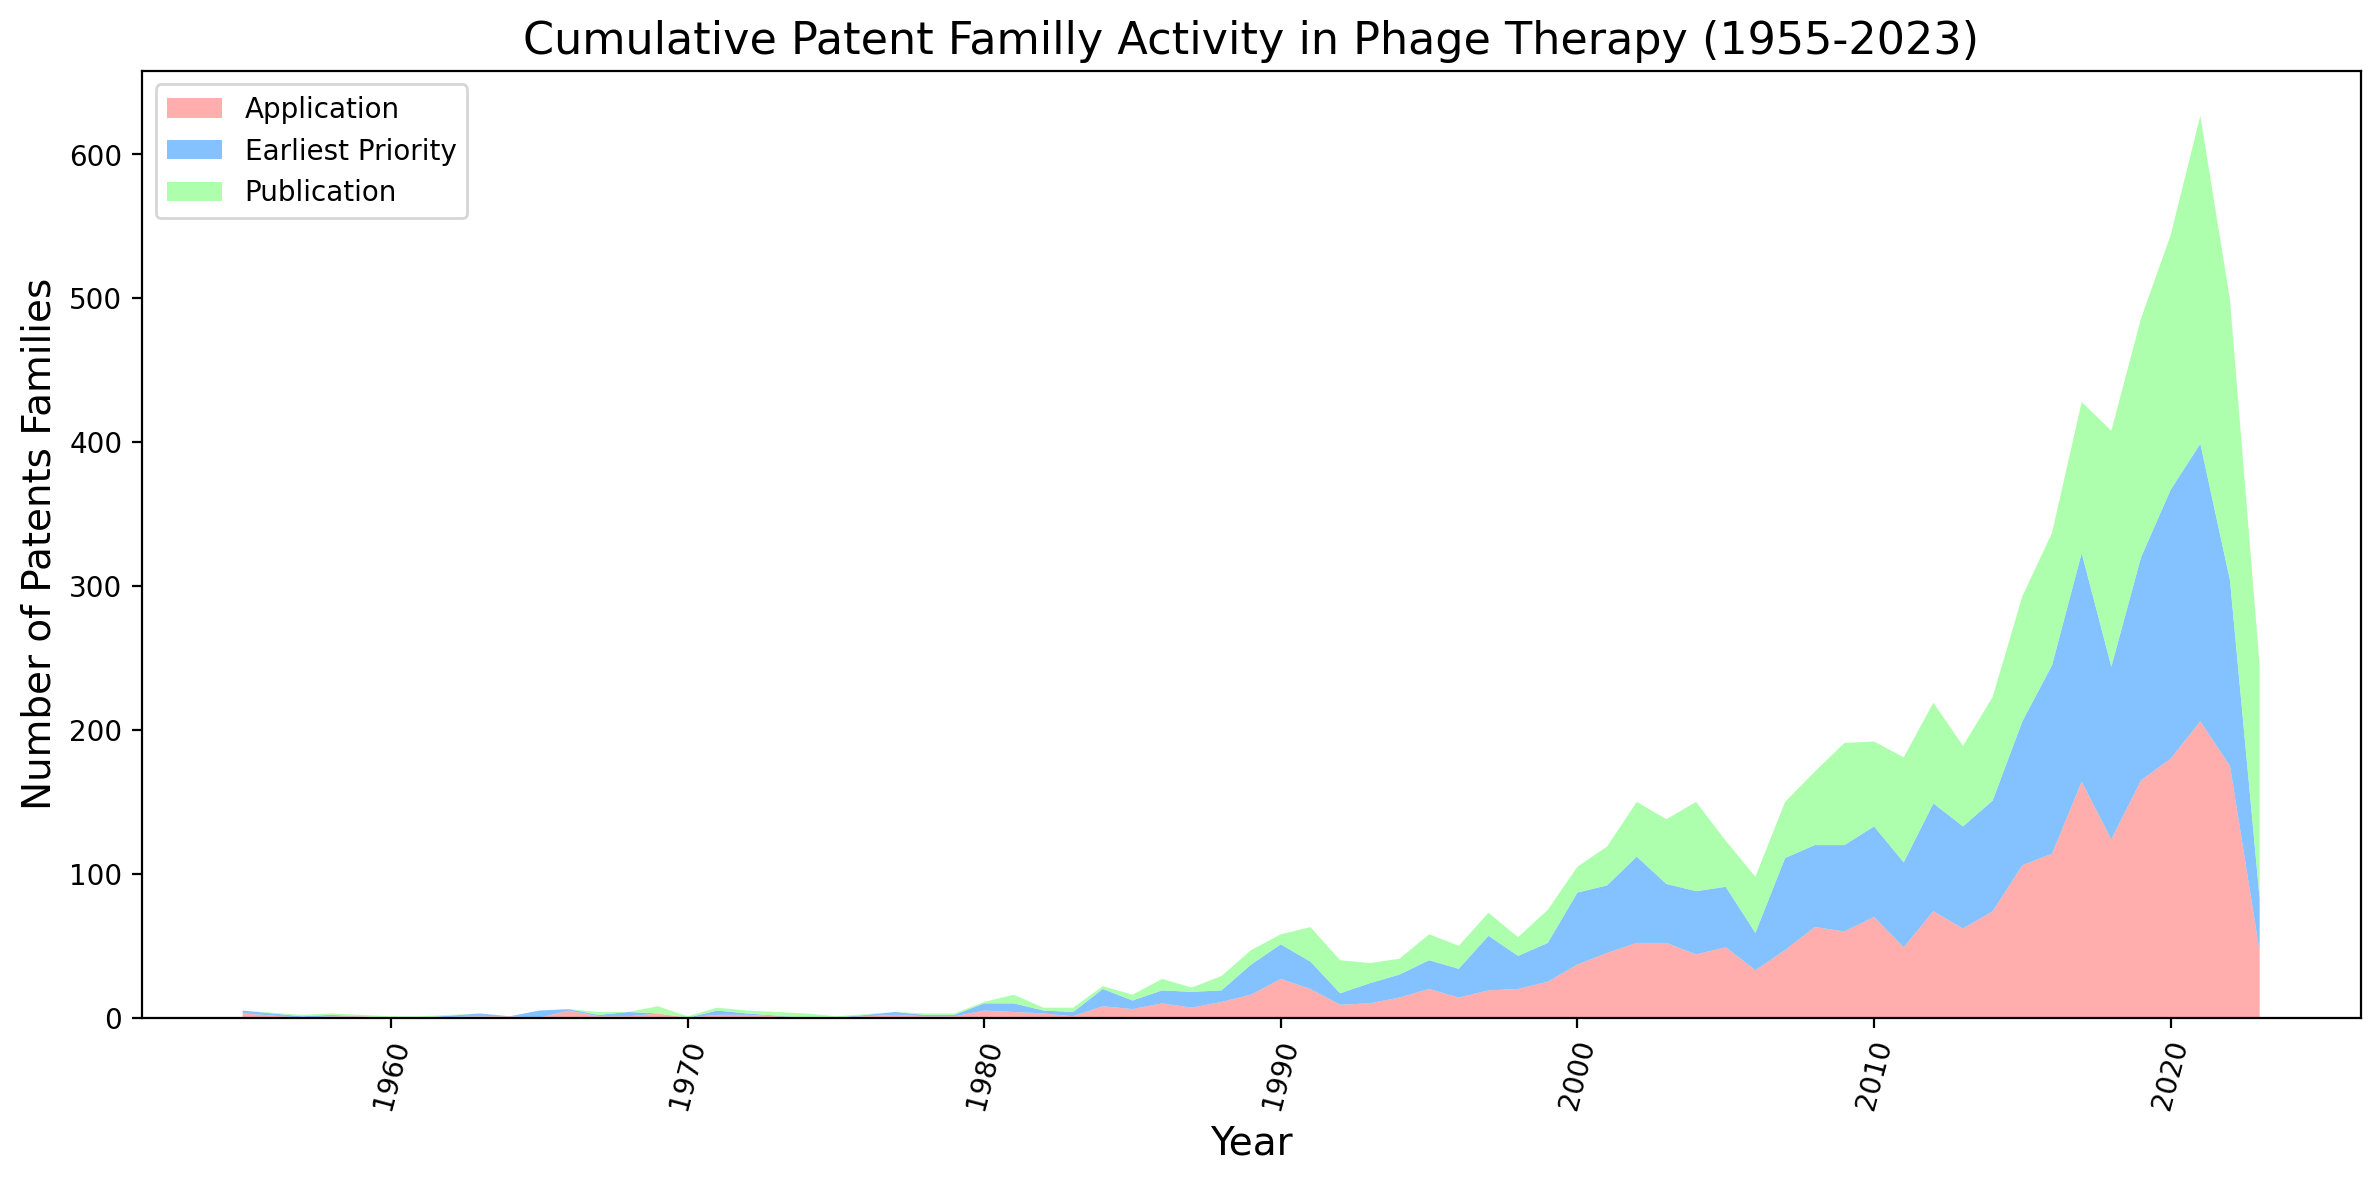

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is in a CSV file called 'patent_data.csv'
#data = pd.read_csv('patent_data.csv')

# Rename your columns for easier access
data_trend.columns = ['Year', 'Application', 'Earliest_Priority', 'Publication']

# Sort data by Year for proper plotting
data_trend = data_trend.sort_values('Year')

# Convert 'Year' to string to avoid any plotting issues
data_trend['Year'] = data_trend['Year'].astype(str)

# Define the x (Year) and y (patent counts) values
x = data_trend['Year'].astype(float).values
y = data_trend[['Application', 'Earliest_Priority', 'Publication']]

# Create the stacked area chart
plt.figure(figsize=(12, 6))
plt.stackplot(x, y.T, labels=['Application', 'Earliest Priority', 'Publication'],
              alpha=0.8, colors=['#ff9999','#66b3ff','#99ff99'])

# Add title and labels
plt.title('Cumulative Patent Familly Activity in Phage Therapy (1955-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Patents Families', fontsize=14)

# Add legend
plt.legend(loc='upper left')

# Display the plot
#plt.grid(True)
plt.xticks(rotation=75)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to prevent clipping
plt.show()


In [ ]:
import textwrap

def wrap_text(text, width=20):
    """Wrap text to the specified width."""
    lines = textwrap.wrap(text, width=width)
    return '\n'.join(lines)
wrap_text('1st phage genome seqenced')

'1st phage genome\nseqenced'

In [ ]:
# Define the text you want to modify
text = 'This is a long text that needs to be modified.'

# Wrap the text using the wrap_text() function
wrapped_text = wrap_text(text, width=10)

# Print the modified text
print(wrapped_text)


This is a
long text
that needs
to be
modified.


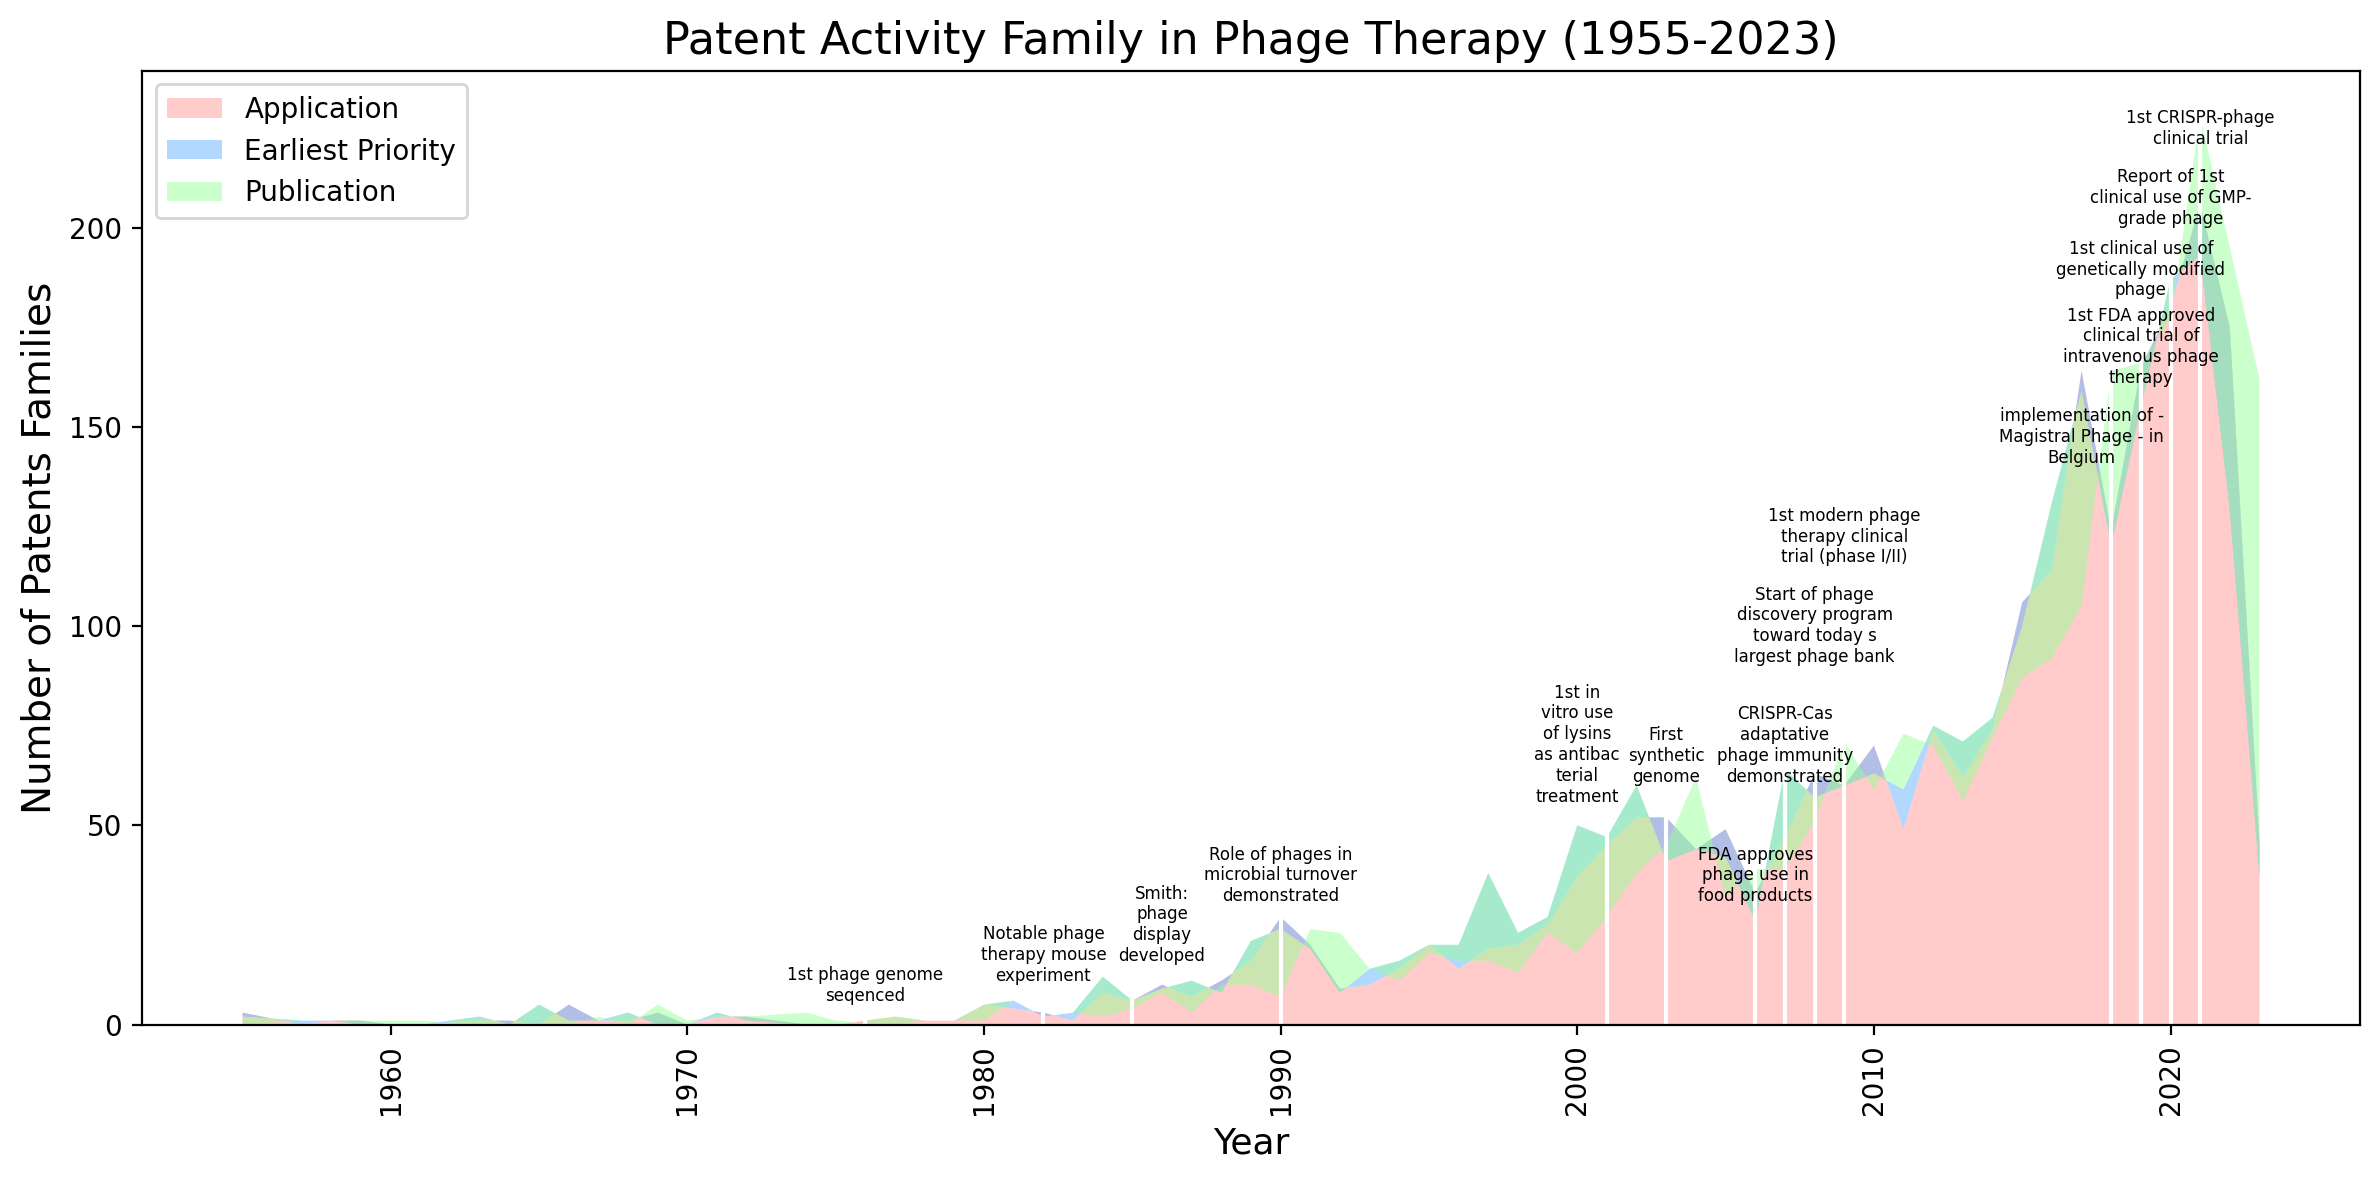

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is in a CSV file called 'patent_data.csv'
#data = pd.read_csv('patent_data.csv')

# Rename your columns for easier access
data_trend.columns = ['Year', 'Application', 'Earliest_Priority', 'Publication']

# Sort data by Year for proper plotting
data_trend2 = data_trend.sort_values('Year')

# Define the x (Year) and y (patent counts) values
x = data_trend2['Year'].astype(float).values

# Create new columns for the adjusted values
data_trend2['Adjusted_Earliest_Priority'] = data_trend2['Earliest_Priority'] - data_trend2['Application']
data_trend2['Adjusted_Publication'] = data_trend2['Publication'] - data_trend2['Earliest_Priority']

y = data_trend2[['Application', 'Adjusted_Earliest_Priority', 'Adjusted_Publication']]

# Create the stacked area chart
plt.figure(figsize=(12, 6))
plt.stackplot(x, y.T, labels=['Application', 'Earliest Priority', 'Publication'],
              alpha=0.5, colors=['#ff9999','#66b3ff','#99ff99'])

# Add title and labels
plt.title('Patent Activity Family in Phage Therapy (1955-2023)', fontsize=16)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Number of Patents Families', fontsize=14)

# Add legend
plt.legend(loc='upper left')

# Draw a vertical line at the x-axis position of 2010
plt.axvline(x=1976, color='white')
# Add a label to the line
plt.text(1976, 5, wrap_text('1st phage genome seqenced'), rotation=360, ha='center', va='bottom', fontsize=6)

# Draw a vertical line at the x-axis position of 2015
plt.axvline(x=1982, color='white')
# Add a label to the line
plt.text(1982, 10, wrap_text('Notable phage therapy mouse experiment'), rotation=360, ha='center', va='bottom', fontsize=6)

# Draw a vertical line at the x-axis position of 2010
plt.axvline(x=2001, color='white')
# Add a label to the line
plt.text(2000, 55, wrap_text('1st in vitro use of lysins as antibacterial treatment', width=10), rotation=360, ha='center', va='bottom', fontsize=6)

# Draw a vertical line at the x-axis position of 2015
plt.axvline(x=2006, color='white')
# Add a label to the line
plt.text(2006, 30, wrap_text('FDA approves phage use in food products', width=15), rotation=360, ha='center', va='bottom', fontsize=6)

# Draw a vertical line at the x-axis position of 2010
plt.axvline(x=2008, color='white')
# Add a label to the line
plt.text(2008, 90, wrap_text('Start of phage discovery program toward today s largest phage bank'), rotation=360, ha='center', va='bottom', fontsize=6)

# Draw a vertical line at the x-axis position of 2015
plt.axvline(x=2009, color='white')
# Add a label to the line
plt.text(2009, 115, wrap_text('1st modern phage therapy clinical trial (phase I/II)'), rotation=360, ha='center', va='bottom', fontsize=6)

# Draw a vertical line at the x-axis position of 2010
plt.axvline(x=2018, color='white')
# Add a label to the line
plt.text(2017, 140, wrap_text('implementation of - Magistral Phage - in Belgium'), rotation=360, ha='center', va='bottom', fontsize=6)

# Draw a vertical line at the x-axis position of 2015
plt.axvline(x=2019, color='white')
# Add a label to the line
plt.text(2019, 160, wrap_text('1st FDA approved clinical trial of intravenous phage therapy'), rotation=360, ha='center', va='bottom', fontsize=6)

# Draw a vertical line at the x-axis position of 2015
plt.axvline(x=2019, color='white')
# Add a label to the line
plt.text(2019, 182, wrap_text('1st clinical use of genetically modified phage'), rotation=360, ha='center', va='bottom', fontsize=6)

# Draw a vertical line at the x-axis position of 2015
plt.axvline(x=2020, color='white')
# Add a label to the line
plt.text(2020, 200, wrap_text('Report of 1st clinical use of GMP-grade phage'), rotation=360, ha='center', va='bottom', fontsize=6)

# Draw a vertical line at the x-axis position of 2015
plt.axvline(x=2021, color='white')
# Add a label to the line
plt.text(2021, 220, wrap_text('1st CRISPR-phage clinical trial'), rotation=360, ha='center', va='bottom', fontsize=6)

# https://www.nature.com/articles/nrmicro3564
# Draw a vertical line at the x-axis position of 2015
plt.axvline(x=1985, color='white')
# Add a label to the line
plt.text(1986, 15, wrap_text('Smith: phage display developed', width=10 ), rotation=360, ha='center', va='bottom', fontsize=6)

# Draw a vertical line at the x-axis position of 2015
plt.axvline(x=1990, color='white')
# Add a label to the line
plt.text(1990, 30, wrap_text('Role of phages in microbial turnover demonstrated'), rotation=360, ha='center', va='bottom', fontsize=6)

# Draw a vertical line at the x-axis position of 2015
plt.axvline(x=2003, color='white')
# Add a label to the line
plt.text(2003, 60, wrap_text('First synthetic genome', width=10 ), rotation=360, ha='center', va='bottom', fontsize=6)

# Draw a vertical line at the x-axis position of 2015
plt.axvline(x=2007, color='white')
# Add a label to the line
plt.text(2007, 60, wrap_text('CRISPR-Cas adaptative phage immunity demonstrated', width=15), rotation=360, ha='center', va='bottom', fontsize=6)

# Display the plot
#plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to prevent clipping
plt.show()


In [ ]:
data_trend#.head(60)

,Year,Application,Earliest_Priority,Publication
43,1955,3,2,0
59,1957,0,1,1
57,1958,1,1,1
55,1959,1,0,1
61,1960,0,0,1
...,...,...,...,...
3,2019,165,155,166
1,2020,180,187,177
0,2021,206,193,228
2,2022,175,129,195


In [ ]:
count_year_1 = data.groupby('Application Year')['Simple Family Size'].sum().rename('Application')
count_year_2 = data.groupby('Earliest Priority Year')['Simple Family Size'].sum().rename('Earliest Priority')
count_year_3 = data.groupby('Publication Year')['Simple Family Size'].sum().rename('Publication')

data_trend_patent = pd.concat([count_year_1, count_year_2, count_year_3], axis=1).fillna(0).astype(int).reset_index().rename(columns={'index': 'Year'})
data_trend_patent

,Year,Application,Earliest Priority,Publication
0,1955,4,3,0
1,1958,1,1,2
2,1959,1,0,1
3,1963,5,6,0
4,1964,1,0,0
...,...,...,...,...
60,1960,0,0,1
61,1961,0,0,1
62,1970,0,0,7
63,1974,0,0,32


Int64


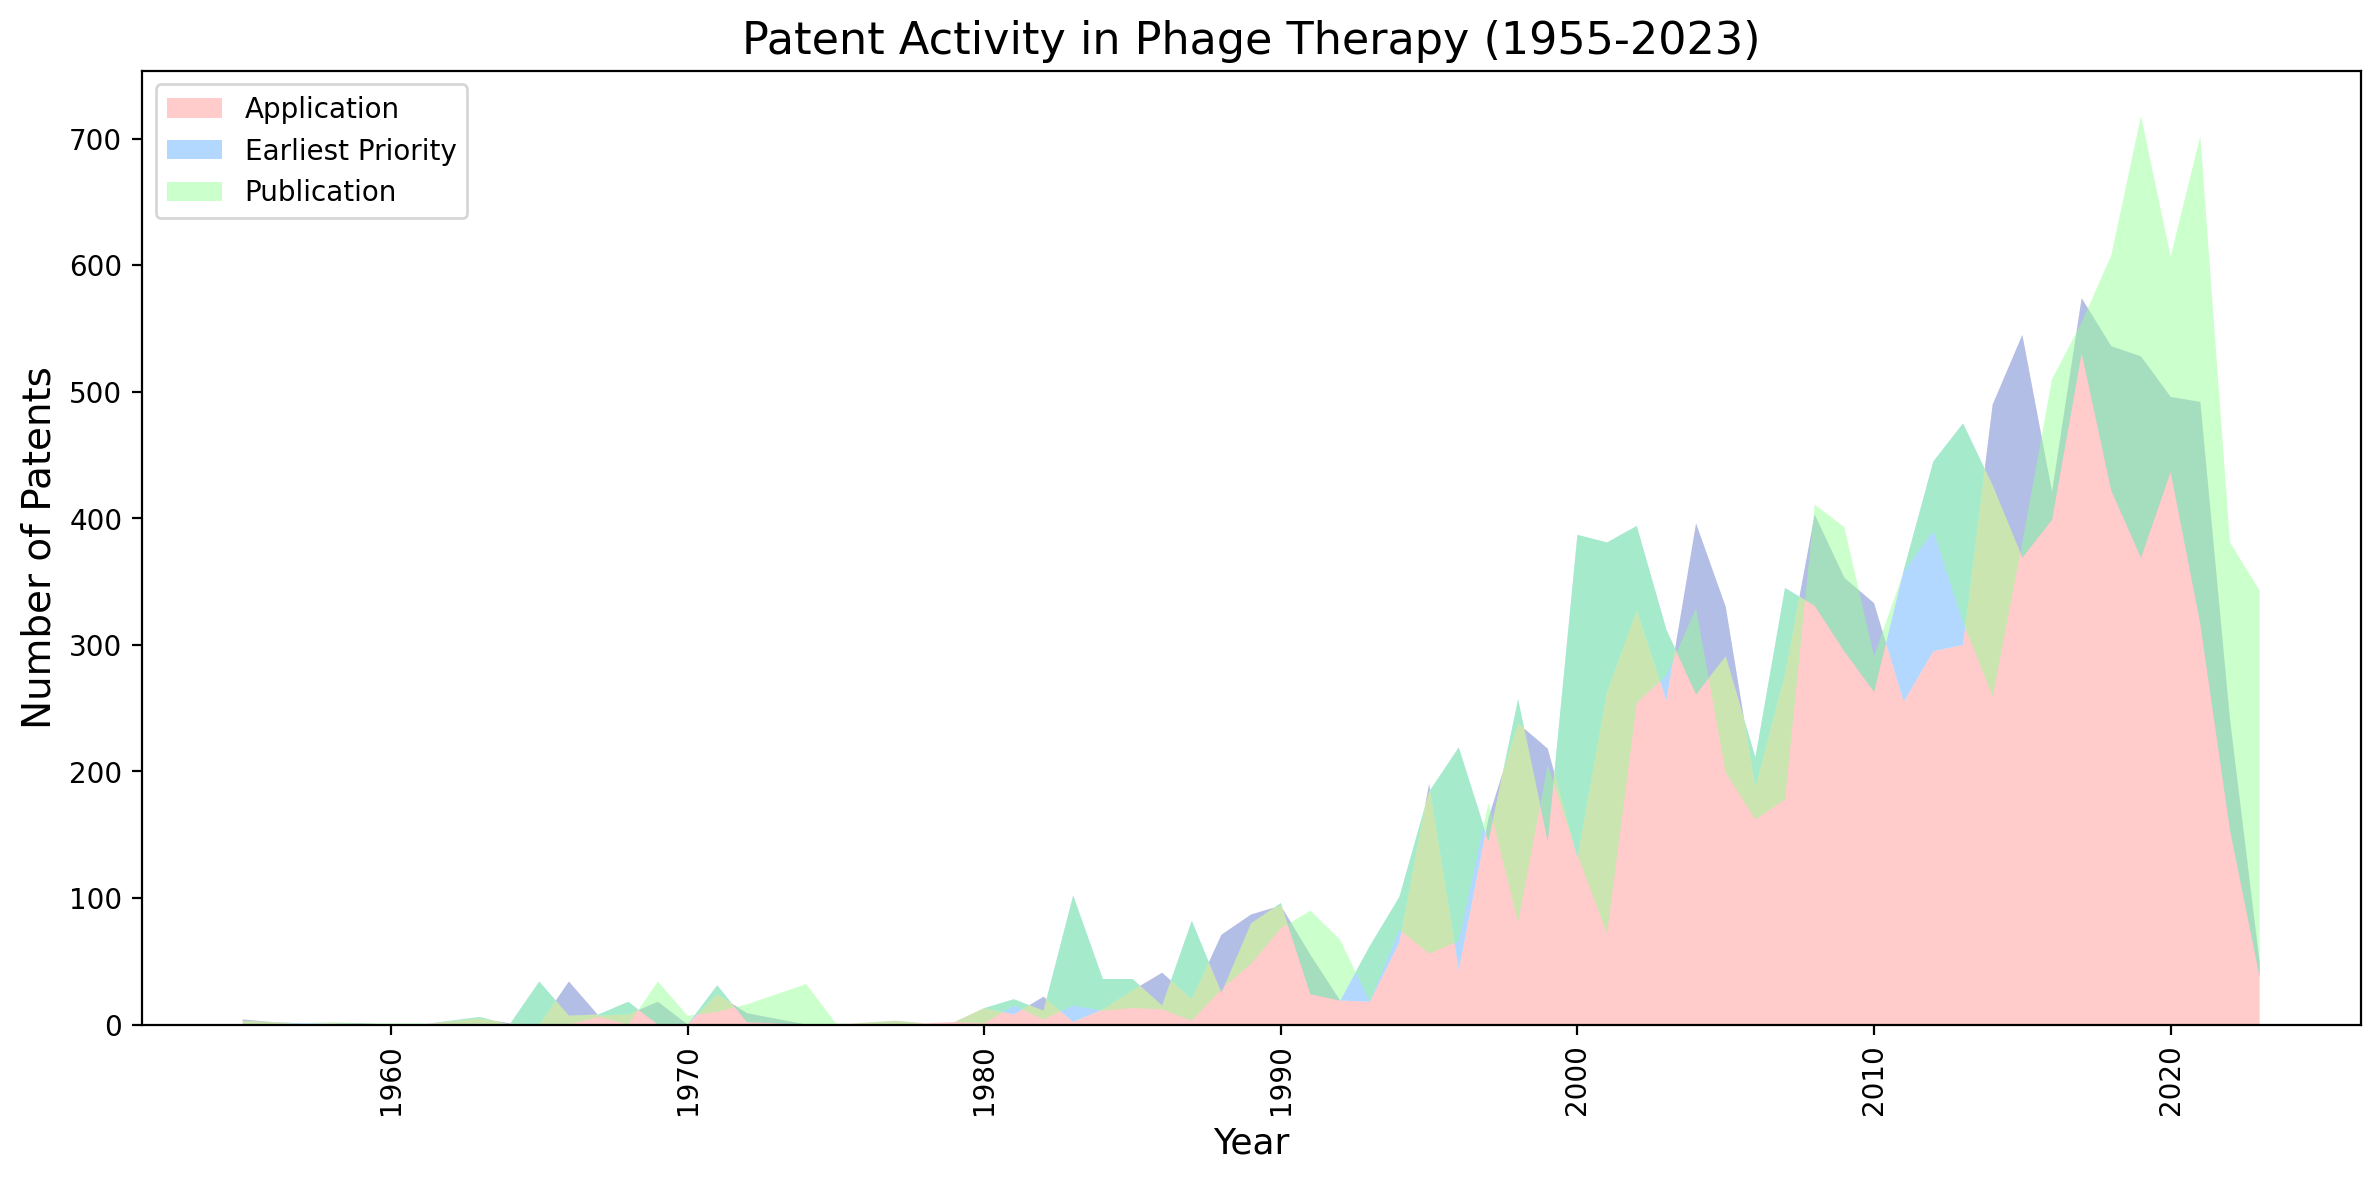

In [ ]:
# Rename your columns for easier access
data_trend_patent.columns = ['Year', 'Application', 'Earliest_Priority', 'Publication']

# Sort data by Year for proper plotting
data_trend_patent2 = data_trend_patent.sort_values('Year')

# Verify that the 'Year' column is of a numeric or datetime type
print(data_trend_patent2['Year'].dtype)

# Create new columns for the adjusted values
data_trend_patent2['Adjusted_Earliest_Priority'] = data_trend_patent2['Earliest_Priority'] - data_trend_patent2['Application']
data_trend_patent2['Adjusted_Publication'] = data_trend_patent2['Publication'] - data_trend_patent2['Earliest_Priority']

# Define the x (Year) and y (patent counts) values
x = data_trend_patent2['Year'].values # Make sure 'Year' is converted to a numpy array if it's not already numeric or datetime
y_columns = ['Application', 'Adjusted_Earliest_Priority', 'Adjusted_Publication']
y = data_trend_patent2[y_columns].values.T  # Transpose the y values

# Before plotting, check for NaN values and handle them
if np.isnan(y).any():
    y = np.nan_to_num(y)  # Convert NaN to zero, which is safe for stackplot

# Convert 'Year' to numpy's int64 type or float if there are NaNs that need to be preserved
x = data_trend_patent2['Year'].astype(float).values

# Check for NaN, Inf, or -Inf in 'y' and handle them
for col in y_columns:
    if np.any(np.isinf(data_trend_patent2[col])) or np.any(np.isnan(data_trend_patent2[col])):
        # Fill NaN with 0 or some suitable value for your data
        data_trend_patent2[col].fillna(0, inplace=True)
        # Replace Inf with a large finite number if necessary
        data_trend_patent2[col].replace([np.inf, -np.inf], np.max(data_trend_patent2[col].finite()), inplace=True)

# Ensure 'y' is a 2D numpy array with a numeric dtype
y = data_trend_patent2[y_columns].values.T

# Ensure 'y' doesn't have NaN or Inf after the transformations
assert not np.isnan(y).any() and not np.isinf(y).any(), "NaN or Inf present in y"

# Now attempt to create the stackplot
plt.figure(figsize=(12, 6))
#plt.stackplot(x, y, labels=y_columns, alpha=0.5, colors=['#ff9999','#66b3ff','#99ff99'])

plt.stackplot(x, y, labels=['Application', 'Earliest Priority', 'Publication'],
              alpha=0.5, colors=['#ff9999','#66b3ff','#99ff99'])

# Add title and labels
plt.title('Patent Activity in Phage Therapy (1955-2023)', fontsize=16)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Number of Patents', fontsize=14)

# Add legend
plt.legend(loc='upper left')

# Rotate x-axis labels and adjust layout
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:

data_trend.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 43 to 19
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               65 non-null     object
 1   Application        65 non-null     int64 
 2   Earliest_Priority  65 non-null     int64 
 3   Publication        65 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.5+ KB


In [ ]:
xxxx

NameError: ignored

# Applicants

In [ ]:
#Import applicants_data
applicants_data = pd.read_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/patent-phage-therapy-lens-23102023-tiab.csv').reset_index()[
    ['Lens ID','Application Date','Applicants','Cited by Patent Count']]

applicants_data['Application Year'] = pd.to_datetime(applicants_data['Application Date']).dt.year
applicants_data['Application Year'] = applicants_data['Application Year'].astype('Int64')

# Convert 'Application Year' to integers
applicants_data['Application Year'] = applicants_data['Application Year'].astype(int)

applicants_data = applicants_data.set_index(['Lens ID','Application Year','Cited by Patent Count'])
applicants_data

In [ ]:
import pandas as pd

# Your DataFrame is named applicants_data
applicants_list = applicants_data['Applicants'].str.split(';;').explode().str.strip()

# Count the unique applicants names
unique_applicants_count = applicants_list.nunique()

print('The number of unique applicants is:', unique_applicants_count)

#
applicants_list2 = applicants_list.to_frame().reset_index()

# and sum citations within each group
grouped = applicants_list2.groupby(['Applicants']).agg({'Lens ID': 'count', 'Cited by Patent Count': 'sum'}).reset_index()

grouped['%'] = grouped['Lens ID']/applicants_data['Applicants'].count()*100
grouped['Average Citation Count'] = grouped['Cited by Patent Count']/grouped['Lens ID']
# Rename columns
grouped.columns = ['Applicants', 'count','citation', '%',  'Average Citation Count']

# Save data
grouped.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/applicants_count_citation_therapy.pkl')
grouped.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/applicants_count_citation_therapy.csv')

grouped#.head(50)

In [ ]:
# Reset the index to make 'Application Year' a regular column
applicants_list2 = applicants_list.to_frame().reset_index()
# Create a new column, 'Application Year', to indicate which 5-Publication Year each row belongs to
#applicants_list2['Application Year'] = pd.cut(applicants_list2['Application Year'], bins=range(2003, 2035, 5), right=False)


# Group by 'Application Year' and '......', count number of publications
# and sum citations within each group
grouped = applicants_list2.groupby(['Application Year','Applicants']).agg({'Lens ID': 'count', 'Cited by Patent Count': 'sum'}).reset_index()
grouped['Average Citation Count'] = grouped['Cited by Patent Count']/grouped['Lens ID']
# Create a boolean mask to identify rows with 0 in the 'Lens ID' column
mask = (grouped['Lens ID'] == 0)

# Use the mask to drop rows with 0 in the 'Lens ID' column
grouped_filtered = grouped[~mask]

# Rename columns
grouped_filtered.columns = ['Application Year','Applicants', 'Publication Count', 'Total Citations',  'Average Citation Count']

grouped_filtered


In [ ]:
# Pivot the DataFrame
pivot_df = grouped_filtered.pivot(index='Applicants', columns='Application Year', values=['Publication Count', 'Total Citations',  'Average Citation Count'])

# Fill NaN values with 0
#pivot_df.fillna(0, inplace=True)
# Save data
pivot_df.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/applicants_list_count_citation_group_year_therapy.pkl')
pivot_df.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/applicants_list_count_citation_group_year_therapy.csv')

# Print the pivoted DataFrame
pivot_df


# Inventors

In [ ]:
#Import inventors_data
inventors_data = pd.read_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/patent-phage-therapy-lens-23102023-tiab.csv').reset_index()[
    ['Lens ID','Application Date','Inventors','Cited by Patent Count']]

inventors_data['Application Year'] = pd.to_datetime(inventors_data['Application Date']).dt.year
inventors_data['Application Year'] = inventors_data['Application Year'].astype('Int64')

# Convert 'Application Year' to integers
inventors_data['Application Year'] = inventors_data['Application Year'].astype(int)

inventors_data = inventors_data.set_index(['Lens ID','Application Year','Cited by Patent Count'])

inventors_data

In [ ]:
import pandas as pd

# Your DataFrame is named inventors_data
inventors_list = inventors_data['Inventors'].str.split(';;').explode().str.strip()

# Count the unique inventors names
unique_inventors_count = inventors_list.nunique()

print('The number of unique inventors is:', unique_inventors_count)

#
inventors_list2 = inventors_list.to_frame().reset_index()

# and sum citations within each group
grouped = inventors_list2.groupby(['Inventors']).agg({'Lens ID': 'count', 'Cited by Patent Count': 'sum'}).reset_index()

grouped['%'] = grouped['Lens ID']/inventors_data['Inventors'].count()*100
grouped['Average Citation Count'] = grouped['Cited by Patent Count']/grouped['Lens ID']
# Rename columns
grouped.columns = ['Inventors', 'count','citation', '%',  'Average Citation Count']

# Save data
grouped.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/inventors_count_citation_therapy.pkl')
grouped.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/inventors_count_citation_therapy.csv')

grouped#.head(50)

In [ ]:
# Reset the index to make 'Application Year' a regular column
inventors_list2 = inventors_list.to_frame().reset_index()
# Create a new column, 'Application Year', to indicate which 5-Publication Year each row belongs to
#inventors_list2['Application Year'] = pd.cut(inventors_list2['Application Year'], bins=range(2003, 2035, 5), right=False)


# Group by 'Application Year' and '......', count number of publications
# and sum citations within each group
grouped = inventors_list2.groupby(['Application Year','Inventors']).agg({'Lens ID': 'count', 'Cited by Patent Count': 'sum'}).reset_index()
grouped['Average Citation Count'] = grouped['Cited by Patent Count']/grouped['Lens ID']
# Create a boolean mask to identify rows with 0 in the 'Lens ID' column
mask = (grouped['Lens ID'] == 0)

# Use the mask to drop rows with 0 in the 'Lens ID' column
grouped_filtered = grouped[~mask]

# Rename columns
grouped_filtered.columns = ['Application Year','Inventors', 'Publication Count', 'Total Citations',  'Average Citation Count']

grouped_filtered


In [ ]:
# Pivot the DataFrame
pivot_df = grouped_filtered.pivot(index='Inventors', columns='Application Year', values=['Publication Count', 'Total Citations',  'Average Citation Count'])

# Fill NaN values with 0
#pivot_df.fillna(0, inplace=True)
# Save data
pivot_df.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/inventors_list_count_citation_group_year_therapy.pkl')
pivot_df.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/inventors_list_count_citation_group_year_therapy.csv')

# Print the pivoted DataFrame
pivot_df


In [ ]:
data.columns

# Jurisdiction

In [ ]:
#Import jurisdiction_data
jurisdiction_data = pd.read_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/patent-phage-therapy-lens-23102023-tiab.csv').reset_index()[
    ['Lens ID','Application Date','Jurisdiction','Cited by Patent Count', 'Simple Family Size']]
jurisdiction_data['Application Year'] = pd.to_datetime(jurisdiction_data['Application Date']).dt.year
jurisdiction_data['Application Year'] = jurisdiction_data['Application Year'].astype('Int64')

# Convert 'Application Year' to integers
jurisdiction_data['Application Year'] = jurisdiction_data['Application Year'].astype(int)

jurisdiction_data = jurisdiction_data.set_index(['Lens ID','Application Year','Cited by Patent Count', 'Simple Family Size'])
jurisdiction_data

In [ ]:
import pandas as pd

# Your DataFrame is named jurisdiction_data
jurisdiction_list = jurisdiction_data['Jurisdiction'].str.split(';;').explode().str.strip()

# Count the unique jurisdiction names
unique_jurisdiction_count = jurisdiction_list.nunique()

print('The number of unique jurisdiction is:', unique_jurisdiction_count)

#
jurisdiction_list2 = jurisdiction_list.to_frame().reset_index()

# and sum citations within each group
grouped = jurisdiction_list2.groupby(['Jurisdiction']).agg({'Lens ID': 'count', 'Cited by Patent Count': 'sum', 'Simple Family Size': 'sum'}).reset_index()



grouped['Average Citation Count'] = grouped['Cited by Patent Count']/grouped['Lens ID']
# Rename columns
grouped.columns = ['Jurisdiction', 'Family Size','citation', 'patent count',  'Average Citation Count']
grouped['% family'] = grouped['Family Size']/jurisdiction_data.reset_index()['Lens ID'].count()*100
grouped['% patent'] = grouped['patent count']/jurisdiction_data.reset_index()['Simple Family Size'].sum()*100
# Save data
#grouped.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/jurisdiction_count_citation_therapy.pkl')
#grouped.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/jurisdiction_count_citation_therapy.csv')

grouped#.head(50)

In [ ]:
import pandas as pd

# Your DataFrame is named jurisdiction_data
jurisdiction_list = jurisdiction_data['Jurisdiction'].str.split(';;').explode().str.strip()

# Count the unique jurisdiction names
unique_jurisdiction_count = jurisdiction_list.nunique()

print('The number of unique jurisdiction is:', unique_jurisdiction_count)

#
jurisdiction_list2 = jurisdiction_list.to_frame().reset_index()

# and sum citations within each group
grouped = jurisdiction_list2.groupby(['Jurisdiction']).agg({'Lens ID': 'count', 'Cited by Patent Count': 'sum'}).reset_index()

grouped['%'] = grouped['Lens ID']/jurisdiction_data['Jurisdiction'].count()*100
grouped['Average Citation Count'] = grouped['Cited by Patent Count']/grouped['Lens ID']
# Rename columns
grouped.columns = ['Jurisdiction', 'count','citation', '%',  'Average Citation Count']

# Save data
grouped.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/jurisdiction_count_citation_therapy.pkl')
grouped.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/jurisdiction_count_citation_therapy.csv')

grouped#.head(50)

In [ ]:
# Reset the index to make 'Application Year' a regular column
jurisdiction_list2 = jurisdiction_list.to_frame().reset_index()
# Create a new column, 'Application Year', to indicate which 5-Publication Year each row belongs to
#jurisdiction_list2['Application Year'] = pd.cut(jurisdiction_list2['Application Year'], bins=range(2003, 2035, 5), right=False)


# Group by 'Application Year' and '......', count number of publications
# and sum citations within each group
grouped = jurisdiction_list2.groupby(['Application Year','Jurisdiction']).agg({'Lens ID': 'count', 'Cited by Patent Count': 'sum'}).reset_index()
grouped['Average Citation Count'] = grouped['Cited by Patent Count']/grouped['Lens ID']
# Create a boolean mask to identify rows with 0 in the 'Lens ID' column
mask = (grouped['Lens ID'] == 0)

# Use the mask to drop rows with 0 in the 'Lens ID' column
grouped_filtered = grouped[~mask]

# Rename columns
grouped_filtered.columns = ['Application Year','Jurisdiction', 'Publication Count', 'Total Citations',  'Average Citation Count']

grouped_filtered


In [ ]:
# Pivot the DataFrame
pivot_df = grouped_filtered.pivot(index='Jurisdiction', columns='Application Year', values=['Publication Count', 'Total Citations',  'Average Citation Count'])

# Fill NaN values with 0
#pivot_df.fillna(0, inplace=True)
# Save data
pivot_df.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/jurisdiction_list_count_citation_group_year_therapy.pkl')
pivot_df.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/jurisdiction_list_count_citation_group_year_therapy.csv')

# Print the pivoted DataFrame
pivot_df


In [ ]:
data['Jurisdiction'].value_counts()

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data is already loaded...

# Grouping patents by country
country_counts = data['Jurisdiction'].value_counts()

# Plotting the top 10 countries using seaborn
plt.figure(figsize=(14, 7))
sns.barplot(x=country_counts.head(10).index, y=country_counts.head(10).values, palette='viridis')
plt.title('Top 10 Countries Leading in Phage Therapy Innovations', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Patents Families', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
sns.despine(bottom=True, left=True)
plt.tight_layout()
plt.show()

# Assuming 'Application Date' column exists
data['Year'] = pd.to_datetime(data['Application Date']).dt.year
yearly_counts = data.groupby(['Year', 'Jurisdiction']).size().unstack().fillna(0)

# Top 10 countries
top_countries = country_counts.head(10)

# Plotting temporal trends for top countries using seaborn
plt.figure(figsize=(16, 9))
for country in top_countries.index:
    sns.lineplot(data=yearly_counts, x=yearly_counts.index, y=country, label=country)

plt.title('Yearly Trend of Patents Families for Leading Countries', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Patents Families', fontsize=14)
plt.legend(title='Country', fontsize=12, title_fontsize='14')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data is already loaded...

# Grouping patents by country
country_counts = data['Jurisdiction'].value_counts()

# Assuming 'Application Date' column exists and is in the correct date format
data['Year'] = pd.to_datetime(data['Application Date']).dt.year
yearly_counts = data.groupby(['Year', 'Jurisdiction']).size().unstack().fillna(0)

# Top 10 countries
top_countries = country_counts.head(10).index

# Plotting temporal trends for top countries using seaborn
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10), sharex=True, sharey=True)

# Enumerate over the top countries and create a lineplot for each
for i, country in enumerate(top_countries):
    row = i // 5  # Determine the row of the subplot
    col = i % 5   # Determine the column of the subplot
    ax = axes[row, col]  # Get the subplot axis

    # Plot on the appropriate subplot
    sns.lineplot(ax=ax, data=yearly_counts, x=yearly_counts.index, y=country)
    ax.set_title(country, fontsize=14)
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Number of Patent Families', fontsize=12)
    ax.tick_params(labelsize=10)

# Adjusting the layout to prevent overlapping
plt.tight_layout()

# Add a general title
plt.suptitle('Yearly Trend of Patent Families for the Top 10 Jurisdictions', fontsize=18, y=1.05)

# Finally, show the plot
plt.show()


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data is already loaded...

# Grouping patents by country
country_counts = data['Jurisdiction'].value_counts()

# Assuming 'Application Date' column exists and is in the correct date format
data['Year'] = pd.to_datetime(data['Application Date']).dt.year
yearly_counts = data.groupby(['Year', 'Jurisdiction']).size().unstack().fillna(0)

# Top 10 countries
top_countries = country_counts.head(10).index

# Plotting temporal trends for top countries using seaborn
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10))

# Enumerate over the top countries and create a lineplot for each
for i, country in enumerate(top_countries):
    row = i // 5  # Determine the row of the subplot
    col = i % 5   # Determine the column of the subplot
    ax = axes[row, col]  # Get the subplot axis

    # Plot on the appropriate subplot
    sns.lineplot(ax=ax, data=yearly_counts, x=yearly_counts.index, y=country)
    ax.set_title(country, fontsize=14)
    ax.set_xlabel('Year', fontsize=12)
    if col == 0:  # Only set y-label for the first column to reduce clutter
        ax.set_ylabel('Number of Patent Families', fontsize=12)
    ax.tick_params(labelsize=10)

# Adjusting the layout to prevent overlapping
plt.tight_layout()

# Add a general title
plt.suptitle('Yearly Trend of Patent Families for the Top 10 Jurisdictions', fontsize=18, y=1.05)

# Finally, show the plot
plt.show()


In [ ]:
data.groupby('Jurisdiction')['Simple Family Size'].sum().sort_values(ascending=False)

In [ ]:
yearly_counts.replace(0, '')

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data is already loaded...

# Grouping patents by country
country_counts = data.groupby('Jurisdiction')['Simple Family Size'].sum().sort_values(ascending=False)

# Plotting the top 10 countries using seaborn
plt.figure(figsize=(14, 7))
sns.barplot(x=country_counts.head(10).index, y=country_counts.head(10).values, palette='viridis')
plt.title('Top 10 Countries Leading in Phage Therapy Innovations', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Patents', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
sns.despine(bottom=True, left=True)
plt.tight_layout()
plt.show()

# Assuming 'Application Date' column exists
data['Year'] = pd.to_datetime(data['Application Date']).dt.year
yearly_counts = data.groupby(['Year', 'Jurisdiction'])['Simple Family Size'].sum().unstack().fillna(0)

# Top 10 countries
top_countries = country_counts.head(10)

# Plotting temporal trends for top countries using seaborn
plt.figure(figsize=(16, 9))
for country in top_countries.index:
    sns.lineplot(data=yearly_counts, x=yearly_counts.index, y=country, label=country)

plt.title('Yearly Trend of Patents for Leading Countries', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Patents', fontsize=14)
plt.legend(title='Country', fontsize=12, title_fontsize='14')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


# Kind

In [ ]:
#Import kind_data
kind_data = pd.read_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/patent-phage-therapy-lens-23102023-tiab.csv').reset_index()[
    ['Lens ID','Application Date','Kind','Cited by Patent Count']]
kind_data['Application Year'] = pd.to_datetime(kind_data['Application Date']).dt.year
kind_data['Application Year'] = kind_data['Application Year'].astype('Int64')

# Convert 'Application Year' to integers
kind_data['Application Year'] = kind_data['Application Year'].astype(int)

kind_data = kind_data.set_index(['Lens ID','Application Year','Cited by Patent Count'])
kind_data

In [ ]:
import pandas as pd

# Your DataFrame is named kind_data
kind_list = kind_data['Kind'].str.split(';;').explode().str.strip()

# Count the unique kind names
unique_kind_count = kind_list.nunique()

print('The number of unique kind is:', unique_kind_count)

#
kind_list2 = kind_list.to_frame().reset_index()

# and sum citations within each group
grouped = kind_list2.groupby(['Kind']).agg({'Lens ID': 'count', 'Cited by Patent Count': 'sum'}).reset_index()

grouped['%'] = grouped['Lens ID']/kind_data['Kind'].count()*100
grouped['Average Citation Count'] = grouped['Cited by Patent Count']/grouped['Lens ID']
# Rename columns
grouped.columns = ['Kind', 'count','citation', '%',  'Average Citation Count']

# Save data
grouped.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/kind_count_citation_therapy.pkl')
grouped.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/kind_count_citation_therapy.csv')

grouped#.head(50)

In [ ]:
# Reset the index to make 'Application Year' a regular column
kind_list2 = kind_list.to_frame().reset_index()
# Create a new column, 'Application Year', to indicate which 5-Publication Year each row belongs to
#kind_list2['Application Year'] = pd.cut(kind_list2['Application Year'], bins=range(2003, 2035, 5), right=False)


# Group by 'Application Year' and '......', count number of publications
# and sum citations within each group
grouped = kind_list2.groupby(['Application Year','Kind']).agg({'Lens ID': 'count', 'Cited by Patent Count': 'sum'}).reset_index()
grouped['Average Citation Count'] = grouped['Cited by Patent Count']/grouped['Lens ID']
# Create a boolean mask to identify rows with 0 in the 'Lens ID' column
mask = (grouped['Lens ID'] == 0)

# Use the mask to drop rows with 0 in the 'Lens ID' column
grouped_filtered = grouped[~mask]

# Rename columns
grouped_filtered.columns = ['Application Year','Kind', 'Publication Count', 'Total Citations',  'Average Citation Count']

grouped_filtered


In [ ]:
# Pivot the DataFrame
pivot_df = grouped_filtered.pivot(index='Kind', columns='Application Year', values=['Publication Count', 'Total Citations',  'Average Citation Count'])

# Fill NaN values with 0
#pivot_df.fillna(0, inplace=True)
# Save data
pivot_df.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/kind_list_count_citation_group_year_therapy.pkl')
pivot_df.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/kind_list_count_citation_group_year_therapy.csv')

# Print the pivoted DataFrame
pivot_df


# IPCR Classifications

In [ ]:
#Import IPCR_classifications_data
IPCR_classifications_data = pd.read_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/patent-phage-therapy-lens-23102023-tiab.csv').reset_index()[
    ['Lens ID','Application Date','IPCR Classifications','Cited by Patent Count']]
IPCR_classifications_data['Application Year'] = pd.to_datetime(IPCR_classifications_data['Application Date']).dt.year
IPCR_classifications_data['Application Year'] = IPCR_classifications_data['Application Year'].astype('Int64')

# Convert 'Application Year' to integers
IPCR_classifications_data['Application Year'] = IPCR_classifications_data['Application Year'].astype(int)

IPCR_classifications_data = IPCR_classifications_data.set_index(['Lens ID','Application Year','Cited by Patent Count'])
IPCR_classifications_data

In [ ]:
import pandas as pd

# Your DataFrame is named IPCR_classifications_data
IPCR_classifications_list = IPCR_classifications_data['IPCR Classifications'].str.split(';;').explode().str.strip()

# Count the unique IPCR_classifications names
unique_IPCR_classifications_count = IPCR_classifications_list.nunique()

print('The number of unique IPCR_classifications is:', unique_IPCR_classifications_count)

#
IPCR_classifications_list2 = IPCR_classifications_list.to_frame().reset_index()

# and sum citations within each group
grouped = IPCR_classifications_list2.groupby(['IPCR Classifications']).agg({'Lens ID': 'count', 'Cited by Patent Count': 'sum'}).reset_index()

grouped['%'] = grouped['Lens ID']/IPCR_classifications_data['IPCR Classifications'].count()*100
grouped['Average Citation Count'] = grouped['Cited by Patent Count']/grouped['Lens ID']
# Rename columns
grouped.columns = ['IPCR Classifications', 'count','citation', '%',  'Average Citation Count']

# Save data
grouped.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/IPCR_classifications_count_citation_therapy.pkl')
grouped.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/IPCR_classifications_count_citation_therapy.csv')

grouped##.head(50)

In [ ]:
# Reset the index to make 'Application Year' a regular column
IPCR_classifications_list2 = IPCR_classifications_list.to_frame().reset_index()
# Create a new column, 'Application Year', to indicate which 5-Publication Year each row belongs to
#IPCR_classifications_list2['Application Year'] = pd.cut(IPCR_classifications_list2['Application Year'], bins=range(2003, 2035, 5), right=False)


# Group by 'Application Year' and '......', count number of publications
# and sum citations within each group
grouped = IPCR_classifications_list2.groupby(['Application Year','IPCR Classifications']).agg({'Lens ID': 'count', 'Cited by Patent Count': 'sum'}).reset_index()
grouped['Average Citation Count'] = grouped['Cited by Patent Count']/grouped['Lens ID']
# Create a boolean mask to identify rows with 0 in the 'Lens ID' column
mask = (grouped['Lens ID'] == 0)

# Use the mask to drop rows with 0 in the 'Lens ID' column
grouped_filtered = grouped[~mask]

# Rename columns
grouped_filtered.columns = ['Application Year','IPCR Classifications', 'Publication Count', 'Total Citations',  'Average Citation Count']

grouped_filtered


In [ ]:
# Pivot the DataFrame
pivot_df = grouped_filtered.pivot(index='IPCR Classifications', columns='Application Year', values=['Publication Count', 'Total Citations',  'Average Citation Count'])

# Fill NaN values with 0
#pivot_df.fillna(0, inplace=True)
# Save data
pivot_df.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/IPCR_classifications_list_count_citation_group_year_therapy.pkl')
pivot_df.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/IPCR_classifications_list_count_citation_group_year_therapy.csv')

# Print the pivoted DataFrame
pivot_df


# Legal Status

In [ ]:
#Import legal_status_data
legal_status_data = pd.read_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/patent-phage-therapy-lens-23102023-tiab.csv').reset_index()[
    ['Lens ID','Application Date','Legal Status','Cited by Patent Count']]
legal_status_data['Application Year'] = pd.to_datetime(legal_status_data['Application Date']).dt.year
legal_status_data['Application Year'] = legal_status_data['Application Year'].astype('Int64')

# Convert 'Application Year' to integers
legal_status_data['Application Year'] = legal_status_data['Application Year'].astype(int)

legal_status_data = legal_status_data.set_index(['Lens ID','Application Year','Cited by Patent Count'])
legal_status_data

In [ ]:
import pandas as pd

# Your DataFrame is named legal_status_data
legal_status_list = legal_status_data['Legal Status'].str.split(';;').explode().str.strip()

# Count the unique legal_status names
unique_legal_status_count = legal_status_list.nunique()

print('The number of unique legal_status is:', unique_legal_status_count)

#
legal_status_list2 = legal_status_list.to_frame().reset_index()

# and sum citations within each group
grouped = legal_status_list2.groupby(['Legal Status']).agg({'Lens ID': 'count', 'Cited by Patent Count': 'sum'}).reset_index()

grouped['%'] = grouped['Lens ID']/legal_status_data['Legal Status'].count()*100

grouped['Average Citation Count'] = grouped['Cited by Patent Count']/grouped['Lens ID']

# Rename columns
grouped.columns = ['Legal Status', 'count','citation', '%',  'Average Citation Count']

# Save data
grouped.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/legal_status_count_citation_therapy.pkl')
grouped.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/legal_status_count_citation_therapy.csv')

grouped#.head(50)

In [ ]:
# Reset the index to make 'Application Year' a regular column
legal_status_list2 = legal_status_list.to_frame().reset_index()
# Create a new column, 'Application Year', to indicate which 5-Publication Year each row belongs to
#legal_status_list2['Application Year'] = pd.cut(legal_status_list2['Application Year'], bins=range(2003, 2035, 5), right=False)


# Group by 'Application Year' and '......', count number of publications
# and sum citations within each group
grouped = legal_status_list2.groupby(['Application Year','Legal Status']).agg({'Lens ID': 'count', 'Cited by Patent Count': 'sum'}).reset_index()

grouped['Average Citation Count'] = grouped['Cited by Patent Count']/grouped['Lens ID']

# Create a boolean mask to identify rows with 0 in the 'Lens ID' column
mask = (grouped['Lens ID'] == 0)

# Use the mask to drop rows with 0 in the 'Lens ID' column
grouped_filtered = grouped[~mask]

# Rename columns
grouped_filtered.columns = ['Application Year','Legal Status', 'Publication Count', 'Total Citations',  'Average Citation Count']

grouped_filtered


In [ ]:
# Pivot the DataFrame
pivot_df = grouped_filtered.pivot(index='Legal Status', columns='Application Year', values=['Publication Count', 'Total Citations',  'Average Citation Count'])

# Fill NaN values with 0
#pivot_df.fillna(0, inplace=True)
# Save data
pivot_df.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/legal_status_list_count_citation_group_year_therapy.pkl')
pivot_df.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/legal_status_list_count_citation_group_year_therapy.csv')

# Print the pivoted DataFrame
pivot_df


In [ ]:
data_trend_legal = pivot_df['Publication Count'].T.reset_index()
data_trend_legal

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming the provided data is in a variable named 'data_trend'
# Replace NaN with 0 for plotting
data_trend_legal.fillna(0, inplace=True)

# The index of the DataFrame seems to be 'Application Year', so let's reset it
data_trend_legal.reset_index(inplace=True)

# Convert 'Application Year' to string for plotting purposes
data_trend_legal['Application Year'] = data_trend_legal['Application Year'].astype(str)

# Define the x (Year) and y (status counts) values
x = data_trend_legal['Application Year'].astype(float).values
y = data_trend_legal[['ACTIVE', 'DISCONTINUED', 'EXPIRED', 'INACTIVE', 'PATENTED', 'PENDING', 'UNKNOWN']].values.T

# Create the stacked area chart
plt.figure(figsize=(12, 6))
plt.stackplot(x, y, labels=['ACTIVE', 'DISCONTINUED', 'EXPIRED', 'INACTIVE', 'PATENTED', 'PENDING', 'UNKNOWN'],
              alpha=0.5)

# Add title and labels
plt.title('Patent Family Legal Status by Application Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Patent Families', fontsize=14)

# Add legend
plt.legend(loc='upper left')

# Display the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to prevent clipping
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming the provided data is in a variable named 'data_trend_legal'
# Replace NaN with 0 for plotting
data_trend_legal.fillna(0, inplace=True)

# The index of the DataFrame seems to be 'Application Year', so let's reset it
data_trend_legal.reset_index(inplace=True)

# Convert 'Application Year' to string for plotting purposes
data_trend_legal['Application Year'] = data_trend_legal['Application Year'].astype(str)

# Normalize the data by row to get the percentage for the 100% stacked bar chart
data_trend_percent = data_trend_legal[['ACTIVE', 'DISCONTINUED', 'EXPIRED', 'INACTIVE', 'PATENTED', 'PENDING', 'UNKNOWN']].div(data_trend_legal[['ACTIVE', 'DISCONTINUED', 'EXPIRED', 'INACTIVE', 'PATENTED', 'PENDING', 'UNKNOWN']].sum(axis=1), axis=0)

# Transpose the data to get percentages for plotting
data_trend_percent = data_trend_percent.T

# Define the x (Year) and y (status counts) values
x = data_trend_legal['Application Year'].values
y = data_trend_percent.values * 100  # Convert fractions to percentages

# Create the 100% stacked bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.85  # The width of the bars
bottom_value = np.zeros(len(x))  # Start the first bar at zero

# Plot each layer of the stacked bar
for i, colname in enumerate(data_trend_percent.index):
    plt.bar(x, y[i], bar_width, bottom=bottom_value, label=colname, alpha=0.5)
    bottom_value += y[i]  # Add the current bar's values to the bottom for the next bar

# Add title and labels
plt.title('Patent Family Legal Status by Application Year (Percentage)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Patent Families', fontsize=14)

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to prevent clipping
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming the provided data is in a variable named 'data_trend_legal'
# Replace NaN with 0 for plotting
data_trend_legal.fillna(0, inplace=True)

# Sum up the statuses across all years
status_sums = data_trend_legal[['ACTIVE', 'DISCONTINUED', 'EXPIRED', 'INACTIVE', 'PATENTED', 'PENDING', 'UNKNOWN']].sum()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(status_sums, labels=status_sums.index, autopct='%1.1f%%', startangle=140) #, colors=plt.cm.tab20.colors)

# Add title
plt.title('Global Distribution of Patent Family Legal Status', fontsize=16)

# Show the plot
plt.tight_layout()  # Adjust the layout to prevent clipping
plt.show()


In [ ]:
status_sums

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is in a CSV file called 'patent_data.csv'
#data = pd.read_csv('patent_data.csv')

# Rename your columns for easier access
data_trend.columns = ['Year', 'Application', 'Earliest_Priority', 'Publication']

# Sort data by Year for proper plotting
data_trend = data_trend.sort_values('Year')

# Convert 'Year' to string to avoid any plotting issues
data_trend['Year'] = data_trend['Year'].astype(str)

# Define the x (Year) and y (patent counts) values
x = data_trend['Year'].astype(float).values
y = data_trend[['Application', 'Earliest_Priority', 'Publication']]

# Create the stacked area chart
plt.figure(figsize=(12, 6))
plt.stackplot(x, y.T, labels=['Application', 'Earliest Priority', 'Publication'],
              alpha=0.8, colors=['#ff9999','#66b3ff','#99ff99'])

# Add title and labels
plt.title('Cumulative Patent Familly Activity in Phage Therapy (1955-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Patents Families', fontsize=14)

# Add legend
plt.legend(loc='upper left')

# Display the plot
#plt.grid(True)
plt.xticks(rotation=75)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to prevent clipping
plt.show()


# topics

In [ ]:
topics_data_citation = pd.read_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/topic_probability_patent_therapy_23102023_10.pkl').reset_index()[
    ['Lens ID','Application Date','Topic N°','Cited by Patent Count']]#.reset_index()
topics_data_citation['Application Year'] = pd.to_datetime(topics_data_citation['Application Date']).dt.year
topics_data_citation['Application Year'] = topics_data_citation['Application Year'].astype('Int64')

topics_data_citation

In [ ]:
#citation_data = data.copy().reset_index().set_index(['Lens ID','Application Year'])[['Cited by Patent Count']]
#citation_data

In [ ]:
#topics_data_citation = pd.concat([topics_data, citation_data], axis=1)
#topics_data_citation

In [ ]:
# Count the unique topic names
unique_topic_count = topics_data_citation['Topic N°'].nunique()

print('The number of unique topics is:', unique_topic_count)

#
topics_data_citation2 = topics_data_citation.reset_index()

# and sum citations within each group
grouped = topics_data_citation2.groupby(['Topic N°']).agg({'Lens ID': 'count', 'Cited by Patent Count': 'sum'}).reset_index()

grouped['%'] = grouped['Lens ID']/topics_data_citation['Topic N°'].count()*100

grouped['Average Citation Count'] = grouped['Cited by Patent Count']/grouped['Lens ID']

# Rename columns
grouped.columns = ['Topic N°', 'Publication Count', 'Total Citations', '%','Average Citation Count']

# Save data
grouped.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/topics_counts_citation_therapy.pkl')
grouped.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/topics_counts_citation_therapy.csv')

grouped#.head(50)

In [ ]:
topics_data2 = topics_data_citation.reset_index()#.set_index('Lens ID')
# Create a new column, 'Application Year', to indicate which 5-Publication Year each row belongs to
#topics_data2['Application Year'] = pd.cut(topics_data2['Application Year'], bins=range(2003, 2035, 5), right=False)

# Group by 'Application Year' and 'Topic N°', count number of publications
# and sum citations within each group
grouped = topics_data2.groupby(['Application Year','Topic N°']).agg({'Lens ID': 'count', 'Cited by Patent Count': 'sum'}).reset_index()

grouped['Average Citation Count'] = grouped['Cited by Patent Count']/grouped['Lens ID']

# Create a boolean mask to identify rows with 0 in the 'Lens ID' column
mask = (grouped['Lens ID'] == 0)

# Use the mask to drop rows with 0 in the 'Lens ID' column
grouped_filtered = grouped[~mask]

# Rename columns
grouped_filtered.columns = ['Application Year','Topic N°', 'Publication Count', 'Total Citations',  'Average Citation Count']

grouped_filtered


In [ ]:
# Pivot the DataFrame
pivot_df = grouped_filtered.pivot(index='Topic N°', columns='Application Year', values=['Publication Count', 'Total Citations',  'Average Citation Count'])

# Fill NaN values with 0
#pivot_df.fillna(0, inplace=True)
# Save data
pivot_df.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/topics_list_count_citation_group_year_therapy.pkl')
pivot_df.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/topics_list_count_citation_group_year_therapy.csv')

# Print the pivoted DataFrame
pivot_df


# name entity recognition

## DISEASES

In [ ]:
import pandas as pd
import glob

folder_path = '/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/'  # Modify with your path
common_name = 'data_patent_therapy_and_diseases_Microorganisms_Taxon_chunk_23102023*'  # Modify with the common part of the filename

# List all files that have the common part in their names
all_files = glob.glob(folder_path + common_name + ".csv*")

# Empty list to store dataframes
dfs = []

for filename in all_files:
    # Read each csv file into a dataframe
    df = pd.read_csv(filename)
    dfs.append(df)

# Concatenate all dataframes into a single dataframe
Diseases_data = pd.concat(dfs, ignore_index=True)

# If you want to save the merged dataframe to a new Excel file:
Diseases_data.to_csv(folder_path + "data_patent_therapy_diseases_Microorganisms_Taxon_chunk_merged_data_20102023.csv", index=False)
Diseases_data['Application Year'] = pd.to_datetime(Diseases_data['Application Date']).dt.year
Diseases_data['Application Year'] = Diseases_data['Application Year'].astype('Int64')

Diseases_data

In [ ]:
import pandas as pd

Diseases_data2 = Diseases_data.set_index(['Lens ID','Application Year','Cited by Patent Count'])

# Replace unwanted characters in column names
Diseases_data2['Diseases'] = Diseases_data2['Diseases'].str.replace(r"[\[\]']", " ", regex=True)
Diseases_data2['Diseases'] = Diseases_data2['Diseases'].str.replace('"', '', regex=False)
Diseases_data2['Diseases'] = Diseases_data2['Diseases'].str.replace('/', ' ', regex=False)
Diseases_data2['Diseases'] = Diseases_data2['Diseases'].str.replace('  ', ' ', regex=False)
Diseases_data2['Diseases'] = Diseases_data2['Diseases'].str.replace("(", " ", regex=False)
Diseases_data2['Diseases'] = Diseases_data2['Diseases'].str.replace(")", " ", regex=False)
Diseases_data2['Diseases'] = Diseases_data2['Diseases'].str.replace("-", " ", regex=False)
Diseases_data2['Diseases'] = Diseases_data2['Diseases'].str.replace("_", " ", regex=False)
Diseases_data2['Diseases'] = Diseases_data2['Diseases'].str.replace(".", " ", regex=False)
Diseases_data2['Diseases'] = Diseases_data2['Diseases'].str.replace(" s ", " ", regex=False)
Diseases_data2['Diseases'] = Diseases_data2['Diseases'].str.strip()
Diseases_data2['Diseases'] = Diseases_data2['Diseases'].str.lower()
# Supprimer les espaces doubles ou multiples
Diseases_data2['Diseases'] = Diseases_data2['Diseases'].str.replace(r'\s+', ' ')



In [ ]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download required datasets from NLTK
nltk.download('wordnet')
nltk.download('punkt')


# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define the function to lemmatize each word
def lemmatize_text(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Apply the function to the specific column
Diseases_data2['Diseases_lemat'] = Diseases_data2['Diseases'].apply(lemmatize_text)

Diseases_data2


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Downloads
nltk.download('wordnet')
nltk.download('stopwords')

# Initialize your stopwords set with wordcloud's stopwords
s = set(STOPWORDS)

# Get stopwords for all languages in NLTK
languages = stopwords.fileids()
for language in languages:
    s.update(stopwords.words(language))

# Add any additional stopwords if needed
s.add('amp')

# If you really need the resulting stopwords as a list:
all_stop_words = list(s)

# Define the function to clean the data
def remove_stop_words(text):
    tokens = text.lower().split(",")  # Tokenize based on commas
    filtered_tokens = [token.strip() for token in tokens if token.strip() not in all_stop_words]
    cleaned_text = ', '.join(filtered_tokens)
    cleaned_text = re.sub(r',\s*,+', ', ', cleaned_text)  # Replace multiple commas with a single comma
    return cleaned_text
# Apply the function to the clinical_data column
Diseases_data2['Diseases_lemat_stop'] = Diseases_data2['Diseases_lemat'].apply(remove_stop_words)

# Define the function to clean the data
def remove_stop_words2(text):
    segments = text.lower().split(",")  # Split based on commas
    cleaned_segments = []
    for segment in segments:
        tokens = segment.split()  # Further split each segment by space
        filtered_tokens = [token for token in tokens if token not in all_stop_words]
        cleaned_segments.append(' '.join(filtered_tokens))
    cleaned_text = ', '.join(cleaned_segments)
    cleaned_text = re.sub(r',\s*,+', ', ', cleaned_text)  # Replace multiple commas with a single comma
    return cleaned_text

# Apply the function to the clinical_data column
Diseases_data2['Diseases_lemat_stop2'] = Diseases_data2['Diseases_lemat'].apply(remove_stop_words2)

Diseases_data2

In [ ]:
# Your DataFrame is named Diseases
Diseases_list = Diseases_data2['Diseases_lemat_stop2'].str.split(', ').explode().str.strip()

# Count the unique Diseases_list names
unique_Diseases_list_count = Diseases_list.nunique()

print('The number of unique Diseases is:', unique_Diseases_list_count)

#
Diseases_list2 = Diseases_list.to_frame().reset_index()
Diseases_list2['Diseases_lemat_stop2'] = Diseases_list2['Diseases_lemat_stop2'].str.strip()
# Drop duplicates in the original DataFrame
Diseases_list2.drop_duplicates(inplace=True)

# and sum citations within each group
grouped = Diseases_list2.groupby(['Diseases_lemat_stop2']).agg({'Lens ID': 'count', 'Cited by Patent Count': 'sum'}).reset_index()

grouped['%'] = grouped['Lens ID']/Diseases_data2['Diseases_lemat_stop2'].count()*100
grouped['Average Citation Count'] = grouped['Cited by Patent Count']/grouped['Lens ID']
# Rename columns
grouped.columns = ['Diseases_lemat_stop2', 'count','citation', '%',  'Average Citation Count']

# Save data
grouped.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/Diseases_count_citation_therapy2.pkl')
grouped.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/Diseases_count_citation_therapy2.csv')

grouped##.head(50)

In [ ]:
Diseases_list2

In [ ]:
# Your DataFrame is named Diseases
Diseases_list = Diseases_data2['Diseases_lemat_stop'].str.split(', ').explode().str.strip()

# Count the unique Diseases_list names
unique_Diseases_list_count = Diseases_list.nunique()

print('The number of unique Diseases is:', unique_Diseases_list_count)

#
Diseases_list2 = Diseases_list.to_frame().reset_index()
Diseases_list2['Diseases_lemat_stop'] = Diseases_list2['Diseases_lemat_stop'].str.strip()
# Drop duplicates in the original DataFrame
Diseases_list2.drop_duplicates(inplace=True)

# and sum citations within each group
grouped = Diseases_list2.groupby(['Diseases_lemat_stop']).agg({'Lens ID': 'count', 'Cited by Patent Count': 'sum'}).reset_index()

grouped['%'] = grouped['Lens ID']/Diseases_data2['Diseases_lemat_stop'].count()*100
grouped['Average Citation Count'] = grouped['Cited by Patent Count']/grouped['Lens ID']
# Rename columns
grouped.columns = ['Diseases_lemat_stop', 'count','citation', '%',  'Average Citation Count']

# Save data
grouped.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/Diseases_count_citation_therapy.pkl')
grouped.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/Diseases_count_citation_therapy.csv')

grouped##.head(50)

In [ ]:
Diseases_list2

In [ ]:
# import clean data
Diseases_counts_clean = pd.read_excel('/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/Diseases-count-citation-therapy_clean2.xls')[
    ['Diseases_lemat_stop','Diseases_lemat_stop_clean']]#.set_index('Diseases_lemat_stop_clean2')
Diseases_counts_clean

In [ ]:
Diseases_list_and_clean = Diseases_list2.merge(Diseases_counts_clean,
                                           left_on='Diseases_lemat_stop',
                                           right_on='Diseases_lemat_stop',
                                           how='left')#.set_index(['Lens ID','Application Year'])
Diseases_list_and_clean = Diseases_list_and_clean.drop('Diseases_lemat_stop', axis = 1)

Diseases_list_and_clean = Diseases_list_and_clean.dropna(subset=['Diseases_lemat_stop_clean'])
Diseases_list_and_clean.drop_duplicates(inplace = True)
Diseases_list_and_clean

In [ ]:
len(Diseases_list_and_clean['Lens ID'].unique())

In [ ]:
# and sum citations within each group
grouped = Diseases_list_and_clean.groupby(['Diseases_lemat_stop_clean']).agg({'Lens ID': 'count', 'Cited by Patent Count': 'sum'}).reset_index()

grouped['%'] = grouped['Lens ID']/Diseases_list_and_clean['Diseases_lemat_stop_clean'].count()*100
grouped['Average Citation Count'] = grouped['Cited by Patent Count']/grouped['Lens ID']
# Rename columns
grouped.columns = ['Diseases', 'count','citation', '%',  'Average Citation Count']

# Save data
grouped.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/Diseases_lemat_stop_clean_count_citation_therapy.pkl')
grouped.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/Diseases_lemat_stop_clean_count_citation_therapy.csv')

grouped##.head(50)

In [ ]:
# Reset the index to make 'Application Year' a regular column
#Diseases_list2 = Diseases_list.to_frame().reset_index()
# Create a new column, 'Application Year', to indicate which 5-Publication Year each row belongs to
#Diseases_list2['Application Year'] = pd.cut(Diseases_list2['Application Year'], bins=range(2003, 2035, 5), right=False)


# Group by 'Application Year' and '......', count number of publications
# and sum citations within each group
grouped = Diseases_list_and_clean.groupby(['Application Year','Diseases_lemat_stop_clean']).agg({'Lens ID': 'count', 'Cited by Patent Count': 'sum'}).reset_index()
grouped['Average Citation Count'] = grouped['Cited by Patent Count']/grouped['Lens ID']
# Create a boolean mask to identify rows with 0 in the 'Lens ID' column
mask = (grouped['Lens ID'] == 0)

# Use the mask to drop rows with 0 in the 'Lens ID' column
grouped_filtered = grouped[~mask]

# Rename columns
grouped_filtered.columns = ['Application Year','Diseases', 'Publication Count', 'Total Citations',  'Average Citation Count']

grouped_filtered


In [ ]:
# Pivot the DataFrame
pivot_df = grouped_filtered.pivot(index='Diseases', columns='Application Year', values=['Publication Count', 'Total Citations',  'Average Citation Count'])

# Fill NaN values with 0
#pivot_df.fillna(0, inplace=True)
# Save data
pivot_df.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/Diseases_list_count_citation_group_year_therapy.pkl')
pivot_df.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/Diseases_list_count_citation_group_year_therapy.csv')

# Print the pivoted DataFrame
pivot_df


In [ ]:
# To get the list of top 50 diseases names
top_50_diseases = Diseases_list_and_clean['Diseases_lemat_stop_clean'].value_counts().head(50).index.tolist()

# Print or use the top_50_diseases
top_50_diseases

In [ ]:
# Filter the DataFrame to only include rows corresponding to Author
filtered_df = pivot_df.loc[top_50_diseases]
filtered_df

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data. Replace this with your actual DataFrame.
df = filtered_df

# Ensure that DataFrames are not empty
assert not df.empty, "Main DataFrame is empty!"

# Filter DataFrame based on column names
publication_columns = [col for col in df.columns if 'Publication Count' in col]
total_citations_columns = [col for col in df.columns if 'Total Citations' in col]
average_citation_count_columns = [col for col in df.columns if 'Average Citation Count' in col]

# Assertions to check if any DataFrame is empty
assert publication_columns, "No columns matched for 'Publication Count'"
assert total_citations_columns, "No columns matched for 'Total Citations'"
assert average_citation_count_columns, "No columns matched for 'Average Citation Count'"

publication_df = df[publication_columns]
average_citation_count_df = df[average_citation_count_columns]

# Extract year from column name function
def extract_year(column_name):
    if isinstance(column_name, tuple):
        return column_name[-1]
    return column_name.split()[-1]

# Generate subplots
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

# Create the heatmaps
sns.heatmap(publication_df, annot=True, cmap="coolwarm", fmt=".0f", ax=axes[0], yticklabels=True)
axes[0].set_title('Publication Count')

sns.heatmap(average_citation_count_df, annot=True, cmap="viridis", fmt=".1f", ax=axes[1], yticklabels=False)
axes[1].set_title('Average Citation Count')


# Set both the x-ticks and their labels for the heatmap
x_ticks = [i for i, col in enumerate(publication_df.columns) if i % 2 == 0]  # Adjust the step if necessary
axes[0].set_xticks(x_ticks)
axes[0].set_xticklabels([extract_year(publication_df.columns[i]) for i in x_ticks])


x_ticks = [i for i, col in enumerate(average_citation_count_df.columns) if i % 2 == 0]  # Adjust the step if necessary
axes[1].set_xticks(x_ticks)
axes[1].set_xticklabels([extract_year(average_citation_count_df.columns[i]) for i in x_ticks])


# Common settings
axes[0].set_ylabel('Diseases')
for ax in axes:
    ax.set_xlabel('Time Periods')

# Super title for all subplots
plt.suptitle('Heatmap of Topics by Metrics')
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save the figure
# plt.savefig("/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Heatmap of TOPICs by Metrics.png", dpi=600)
plt.show()


# MICROORGANISMS

In [ ]:
import pandas as pd

Taxons_data2 = Diseases_data.set_index(['Lens ID','Application Year','Cited by Patent Count'])

# Replace unwanted characters in column names
Taxons_data2['Taxons'] = Taxons_data2['Taxons'].str.replace(r"[\[\]']", " ", regex=True)
Taxons_data2['Taxons'] = Taxons_data2['Taxons'].str.replace('"', '', regex=False)
Taxons_data2['Taxons'] = Taxons_data2['Taxons'].str.replace('/', ' ', regex=False)
Taxons_data2['Taxons'] = Taxons_data2['Taxons'].str.replace('  ', ' ', regex=False)
Taxons_data2['Taxons'] = Taxons_data2['Taxons'].str.replace("(", " ", regex=False)
Taxons_data2['Taxons'] = Taxons_data2['Taxons'].str.replace(")", " ", regex=False)
Taxons_data2['Taxons'] = Taxons_data2['Taxons'].str.replace("-", " ", regex=False)
Taxons_data2['Taxons'] = Taxons_data2['Taxons'].str.replace("_", " ", regex=False)
Taxons_data2['Taxons'] = Taxons_data2['Taxons'].str.replace(".", " ", regex=False)
Taxons_data2['Taxons'] = Taxons_data2['Taxons'].str.replace(" s ", " ", regex=False)
Taxons_data2['Taxons'] = Taxons_data2['Taxons'].str.strip()
Taxons_data2['Taxons'] = Taxons_data2['Taxons'].str.lower()
# Supprimer les espaces doubles ou multiples
Taxons_data2['Taxons'] = Taxons_data2['Taxons'].str.replace(r'\s+', ' ')



In [ ]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download required datasets from NLTK
nltk.download('wordnet')
nltk.download('punkt')


# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define the function to lemmatize each word
def lemmatize_text(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Apply the function to the specific column
Taxons_data2['Taxons_lemat'] = Taxons_data2['Taxons'].apply(lemmatize_text)

Taxons_data2


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Downloads
nltk.download('wordnet')
nltk.download('stopwords')

# Initialize your stopwords set with wordcloud's stopwords
s = set(STOPWORDS)

# Get stopwords for all languages in NLTK
languages = stopwords.fileids()
for language in languages:
    s.update(stopwords.words(language))

# Add any additional stopwords if needed
s.add('amp')

# If you really need the resulting stopwords as a list:
all_stop_words = list(s)

# Define the function to clean the data
def remove_stop_words(text):
    tokens = text.lower().split(",")  # Tokenize based on commas
    filtered_tokens = [token.strip() for token in tokens if token.strip() not in all_stop_words]
    cleaned_text = ', '.join(filtered_tokens)
    cleaned_text = re.sub(r',\s*,+', ', ', cleaned_text)  # Replace multiple commas with a single comma
    return cleaned_text
# Apply the function to the clinical_data column
Taxons_data2['Taxons_lemat_stop'] = Taxons_data2['Taxons_lemat'].apply(remove_stop_words)

# Define the function to clean the data
def remove_stop_words2(text):
    segments = text.lower().split(",")  # Split based on commas
    cleaned_segments = []
    for segment in segments:
        tokens = segment.split()  # Further split each segment by space
        filtered_tokens = [token for token in tokens if token not in all_stop_words]
        cleaned_segments.append(' '.join(filtered_tokens))
    cleaned_text = ', '.join(cleaned_segments)
    cleaned_text = re.sub(r',\s*,+', ', ', cleaned_text)  # Replace multiple commas with a single comma
    return cleaned_text

# Apply the function to the clinical_data column
Taxons_data2['Taxons_lemat_stop2'] = Taxons_data2['Taxons_lemat'].apply(remove_stop_words2)

Taxons_data2

In [ ]:
# Your DataFrame is named Taxons
Taxons_list = Taxons_data2['Taxons_lemat_stop2'].str.split(', ').explode().str.strip()

# Count the unique Taxons_list names
unique_Taxons_list_count = Taxons_list.nunique()

print('The number of unique Taxons is:', unique_Taxons_list_count)

#
Taxons_list2 = Taxons_list.to_frame().reset_index()
Taxons_list2['Taxons_lemat_stop2'] = Taxons_list2['Taxons_lemat_stop2'].str.strip()
# Drop duplicates in the original DataFrame
Taxons_list2.drop_duplicates(inplace=True)

# and sum citations within each group
grouped = Taxons_list2.groupby(['Taxons_lemat_stop2']).agg({'Lens ID': 'count', 'Cited by Patent Count': 'sum'}).reset_index()

grouped['%'] = grouped['Lens ID']/Taxons_data2['Taxons_lemat_stop2'].count()*100
grouped['Average Citation Count'] = grouped['Cited by Patent Count']/grouped['Lens ID']
# Rename columns
grouped.columns = ['Taxons_lemat_stop2', 'count','citation', '%',  'Average Citation Count']

# Save data
grouped.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/Taxons_count_citation_therapy2.pkl')
grouped.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/Taxons_count_citation_therapy2.csv')

grouped##.head(50)

In [ ]:
Taxons_list2

In [ ]:
# Your DataFrame is named Taxons
Taxons_list = Taxons_data2['Taxons_lemat_stop'].str.split(', ').explode().str.strip()

# Count the unique Taxons_list names
unique_Taxons_list_count = Taxons_list.nunique()

print('The number of unique Taxons is:', unique_Taxons_list_count)

#
Taxons_list2 = Taxons_list.to_frame().reset_index()
Taxons_list2['Taxons_lemat_stop'] = Taxons_list2['Taxons_lemat_stop'].str.strip()
# Drop duplicates in the original DataFrame
Taxons_list2.drop_duplicates(inplace=True)

# and sum citations within each group
grouped = Taxons_list2.groupby(['Taxons_lemat_stop']).agg({'Lens ID': 'count', 'Cited by Patent Count': 'sum'}).reset_index()

grouped['%'] = grouped['Lens ID']/Taxons_data2['Taxons_lemat_stop'].count()*100
grouped['Average Citation Count'] = grouped['Cited by Patent Count']/grouped['Lens ID']
# Rename columns
grouped.columns = ['Taxons_lemat_stop', 'count','citation', '%',  'Average Citation Count']

# Save data
grouped.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/Taxons_count_citation_therapy.pkl')
grouped.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/Taxons_count_citation_therapy.csv')

grouped##.head(50)

In [ ]:
Taxons_list2

In [ ]:
# import clean data
Taxons_counts_clean = pd.read_excel('/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/Taxons-count-citation-therapy_clean.xls')[
    ['Taxons_lemat_stop','Taxons_lemat_stop_clean']]#.set_index('Taxons_lemat_stop_clean2') # Taxons-count-citation-therapy_clean # Taxons-count-citation-therapy-clean_clean

# Replace unwanted characters in column names
Taxons_counts_clean['Taxons_lemat_stop_clean'] = Taxons_counts_clean['Taxons_lemat_stop_clean'].str.replace(r"[\[\]']", " ", regex=True)
Taxons_counts_clean['Taxons_lemat_stop_clean'] = Taxons_counts_clean['Taxons_lemat_stop_clean'].str.replace('"', '', regex=False)
Taxons_counts_clean['Taxons_lemat_stop_clean'] = Taxons_counts_clean['Taxons_lemat_stop_clean'].str.replace('/', ' ', regex=False)
Taxons_counts_clean['Taxons_lemat_stop_clean'] = Taxons_counts_clean['Taxons_lemat_stop_clean'].str.replace('  ', ' ', regex=False)
Taxons_counts_clean['Taxons_lemat_stop_clean'] = Taxons_counts_clean['Taxons_lemat_stop_clean'].str.replace("(", " ", regex=False)
Taxons_counts_clean['Taxons_lemat_stop_clean'] = Taxons_counts_clean['Taxons_lemat_stop_clean'].str.replace(")", " ", regex=False)
Taxons_counts_clean['Taxons_lemat_stop_clean'] = Taxons_counts_clean['Taxons_lemat_stop_clean'].str.replace("-", " ", regex=False)
Taxons_counts_clean['Taxons_lemat_stop_clean'] = Taxons_counts_clean['Taxons_lemat_stop_clean'].str.replace("_", " ", regex=False)
Taxons_counts_clean['Taxons_lemat_stop_clean'] = Taxons_counts_clean['Taxons_lemat_stop_clean'].str.replace(".", " ", regex=False)
Taxons_counts_clean['Taxons_lemat_stop_clean'] = Taxons_counts_clean['Taxons_lemat_stop_clean'].str.replace(" s ", " ", regex=False)
Taxons_counts_clean['Taxons_lemat_stop_clean'] = Taxons_counts_clean['Taxons_lemat_stop_clean'].str.strip()
Taxons_counts_clean['Taxons_lemat_stop_clean'] = Taxons_counts_clean['Taxons_lemat_stop_clean'].str.lower()
# Supprimer les espaces doubles ou multiples
Taxons_counts_clean['Taxons_lemat_stop_clean'] = Taxons_counts_clean['Taxons_lemat_stop_clean'].str.replace(r'\s+', ' ')

Taxons_counts_clean

In [ ]:
Taxons_list_and_clean = Taxons_list2.merge(Taxons_counts_clean,
                                           left_on='Taxons_lemat_stop',
                                           right_on='Taxons_lemat_stop',
                                           how='left')#.set_index(['Lens ID','Application Year'])
Taxons_list_and_clean = Taxons_list_and_clean.drop('Taxons_lemat_stop', axis = 1)

Taxons_list_and_clean = Taxons_list_and_clean.dropna(subset=['Taxons_lemat_stop_clean'])
Taxons_list_and_clean.drop_duplicates(inplace = True)
Taxons_list_and_clean

In [ ]:
len(Taxons_list_and_clean['Lens ID'].unique())

In [ ]:
#1987

In [ ]:
# and sum citations within each group
grouped = Taxons_list_and_clean.groupby(['Taxons_lemat_stop_clean']).agg({'Lens ID': 'count', 'Cited by Patent Count': 'sum'}).reset_index()

grouped['%'] = grouped['Lens ID']/Taxons_list_and_clean['Taxons_lemat_stop_clean'].count()*100
grouped['Average Citation Count'] = grouped['Cited by Patent Count']/grouped['Lens ID']
# Rename columns
grouped.columns = ['Taxons', 'count','citation', '%',  'Average Citation Count']

# Save data
grouped.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/Taxons_lemat_stop_clean_count_citation_therapy.pkl')
grouped.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/Taxons_lemat_stop_clean_count_citation_therapy.csv')

grouped##.head(50)

In [ ]:
## 1044 rows × 5 columns

In [ ]:
# Reset the index to make 'Application Year' a regular column
#Taxons_list2 = Taxons_list.to_frame().reset_index()
# Create a new column, 'Application Year', to indicate which 5-Publication Year each row belongs to
#Taxons_list2['Application Year'] = pd.cut(Taxons_list2['Application Year'], bins=range(2003, 2035, 5), right=False)


# Group by 'Application Year' and '......', count number of publications
# and sum citations within each group
grouped = Taxons_list_and_clean.groupby(['Application Year','Taxons_lemat_stop_clean']).agg({'Lens ID': 'count', 'Cited by Patent Count': 'sum'}).reset_index()
grouped['Average Citation Count'] = grouped['Cited by Patent Count']/grouped['Lens ID']
# Create a boolean mask to identify rows with 0 in the 'Lens ID' column
mask = (grouped['Lens ID'] == 0)

# Use the mask to drop rows with 0 in the 'Lens ID' column
grouped_filtered = grouped[~mask]

# Rename columns
grouped_filtered.columns = ['Application Year','Taxons', 'Publication Count', 'Total Citations',  'Average Citation Count']

grouped_filtered


In [ ]:
# Pivot the DataFrame
pivot_df = grouped_filtered.pivot(index='Taxons', columns='Application Year', values=['Publication Count', 'Total Citations',  'Average Citation Count'])

# Fill NaN values with 0
#pivot_df.fillna(0, inplace=True)
# Save data
pivot_df.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/Taxons_list_count_citation_group_year_therapy.pkl')
pivot_df.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Microorganisms_Taxon_THERAPY/Taxons_list_count_citation_group_year_therapy.csv')

# Print the pivoted DataFrame
pivot_df


In [ ]:
# To get the list of top 50 Taxons names
top_50_Taxons = Taxons_list_and_clean['Taxons_lemat_stop_clean'].value_counts().head(50).index.tolist()

# Print or use the top_50_Taxons
top_50_Taxons

In [ ]:
# Filter the DataFrame to only include rows corresponding to Author
filtered_df = pivot_df.loc[top_50_Taxons]
filtered_df

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data. Replace this with your actual DataFrame.
df = filtered_df

# Ensure that DataFrames are not empty
assert not df.empty, "Main DataFrame is empty!"

# Filter DataFrame based on column names
publication_columns = [col for col in df.columns if 'Publication Count' in col]
total_citations_columns = [col for col in df.columns if 'Total Citations' in col]
average_citation_count_columns = [col for col in df.columns if 'Average Citation Count' in col]

# Assertions to check if any DataFrame is empty
assert publication_columns, "No columns matched for 'Publication Count'"
assert total_citations_columns, "No columns matched for 'Total Citations'"
assert average_citation_count_columns, "No columns matched for 'Average Citation Count'"

publication_df = df[publication_columns]
average_citation_count_df = df[average_citation_count_columns]

# Extract year from column name function
def extract_year(column_name):
    if isinstance(column_name, tuple):
        return column_name[-1]
    return column_name.split()[-1]

# Generate subplots
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

# Create the heatmaps
sns.heatmap(publication_df, annot=True, cmap="coolwarm", fmt=".0f", ax=axes[0], yticklabels=True)
axes[0].set_title('Publication Count')

sns.heatmap(average_citation_count_df, annot=True, cmap="viridis", fmt=".1f", ax=axes[1], yticklabels=False)
axes[1].set_title('Average Citation Count')


# Set both the x-ticks and their labels for the heatmap
x_ticks = [i for i, col in enumerate(publication_df.columns) if i % 2 == 0]  # Adjust the step if necessary
axes[0].set_xticks(x_ticks)
axes[0].set_xticklabels([extract_year(publication_df.columns[i]) for i in x_ticks])


x_ticks = [i for i, col in enumerate(average_citation_count_df.columns) if i % 2 == 0]  # Adjust the step if necessary
axes[1].set_xticks(x_ticks)
axes[1].set_xticklabels([extract_year(average_citation_count_df.columns[i]) for i in x_ticks])


# Common settings
axes[0].set_ylabel('Taxons')
for ax in axes:
    ax.set_xlabel('Time Periods')

# Super title for all subplots
plt.suptitle('Heatmap of Topics by Metrics')
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save the figure
# plt.savefig("/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Heatmap of TOPICs by Metrics.png", dpi=600)
plt.show()
